# Generate calibration curves

To generate calibration curves:
- Prepare different calibration samples with a range of substrate concentrations (e.g. 0.5, 1, 2, 5, and 10 mM of glucose). If substrates show up at different retention times, different substrates can be mixed into one sample. 
- Run HPLC to analyze samples
- Run this script, step by step, to analyze the HPLC runs and gerate calibration curves. 
- Calibration curve coordinates (slope and offset) are copied to "data/calibration.json" so that they can be easily used when running data. 


In [37]:
#!pip install cremerlab-utils #you can use pip to install the required scripts
import sys, os
#add to system path to access pip packages
#sys.path.insert(0, os.path.expanduser('~/.local/lib/python3.8/site-packages'))
#sys.path.insert(0, os.path.expanduser('~/temp'))
import glob 
import cremerlab.hplc #submodule to analyze hplc data
#load required pacakges (as always)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from scipy.integrate import odeint #this is the module to solve ODEs
%matplotlib inline
# Load the scipy module
import scipy.stats 
import json

#runc="YCA_scfa_calibration_230706_2.5mM"
#raw_calib_files = glob.glob('data_hplc/'+runc+'/*.txt') #this gives list of thefiles
#display(raw_calib_files)
#display(raw_calib_files)
#cremerlab.hplc.convert(raw_calib_files) #convert into simple txt iles with ch''''''romatogram info (and some metadata as comments)
#"propionate","ethanol","succinate","lactate"
#[29,30],[32,33],[20.6,21.2], [20,20.9]

# Zurich calibration runs

Processing files...: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.53it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.03it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1306: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to 

******Calibration curve*****
Calibration for substrate glucose
[14.8, 15.5]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
1       14.878212                  15.000000  0.212061  1.646490   8.820323   
1       14.859367                  15.000000  0.252760  1.807081  52.169983   
1       14.890756                  15.000000  0.208721  1.914013   1.305441   
1       14.881612                  15.000000  0.217207  1.606412  14.139483   
0       14.902622                  15.000000  0.190938  1.890333   0.233646   
1       14.863532                  14.983333  0.236105  1.738615  26.223704   
1       14.858105                  14.983333  0.240808  1.766959  30.663582   
1       14.868424                  15.000000  0.229924  1.700871  21.295834   
1       14.857465                  14.983333  0.246220  1.787644  37.280453   
1       14.878218                  15.000000  0.222581  1.918121   2.763309   

        area  peak_idx                                             sample  
1   4.688518         2  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
1  33.053608         2  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
1   0.682988         2  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
1   7.698349         2  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
0   0.111701         1  STD_02.1_Glu_Malt_FP_09_92_RI_1_mMhis0.5_chrom...  
1  15.519911         2  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
1  18.509028         2  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
1  12.273104         2  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
1  23.008783         2  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
1   1.541729         2  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 0.6195850577868284
Intercept: 0.20541991972136042
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


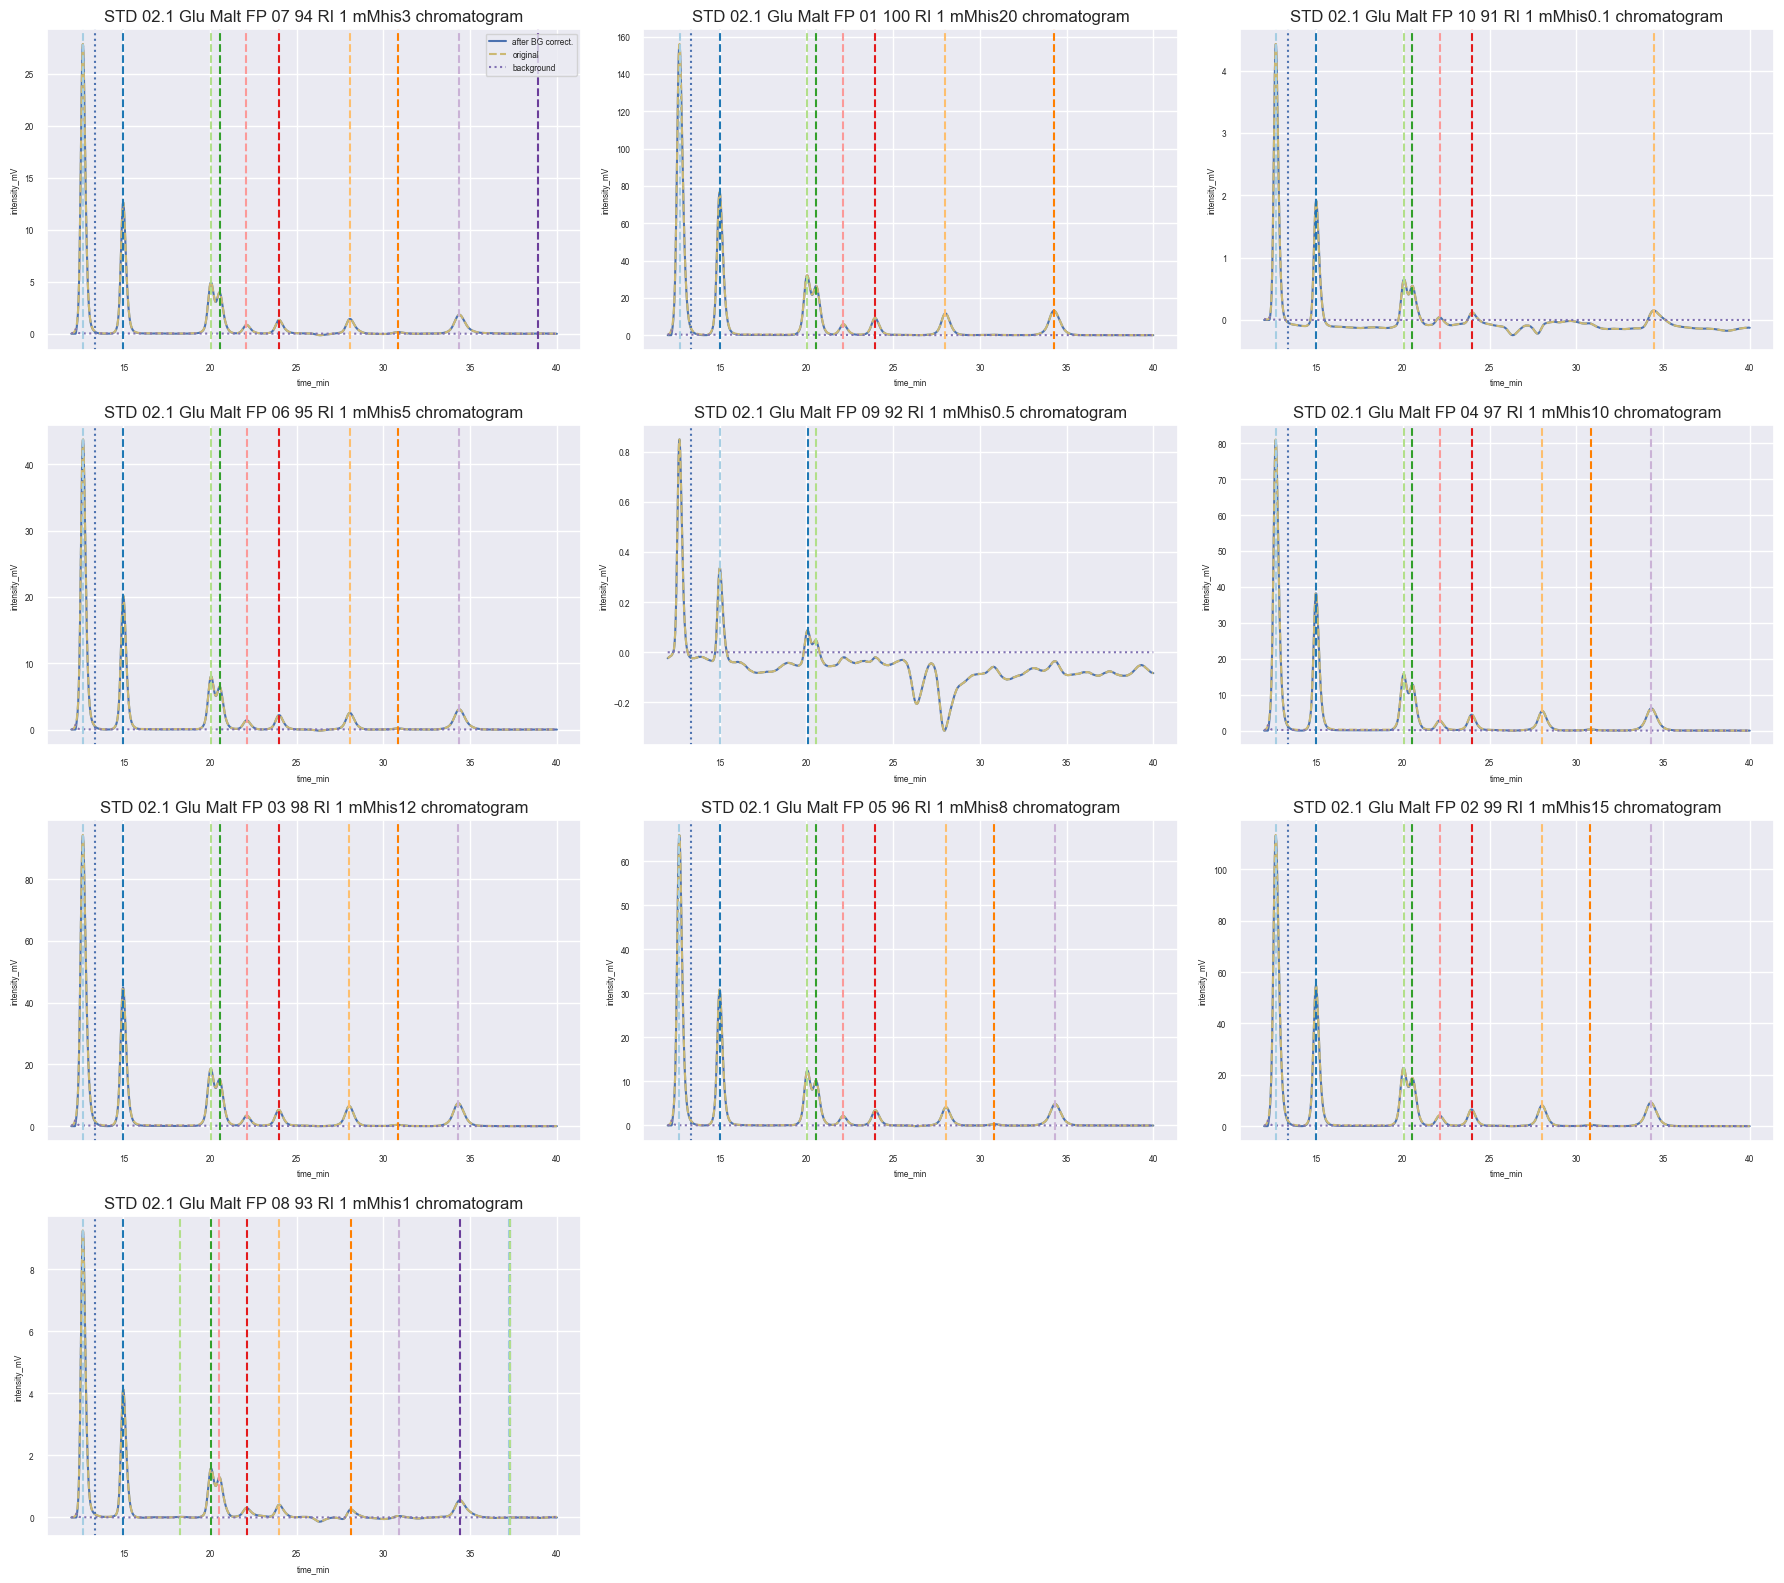

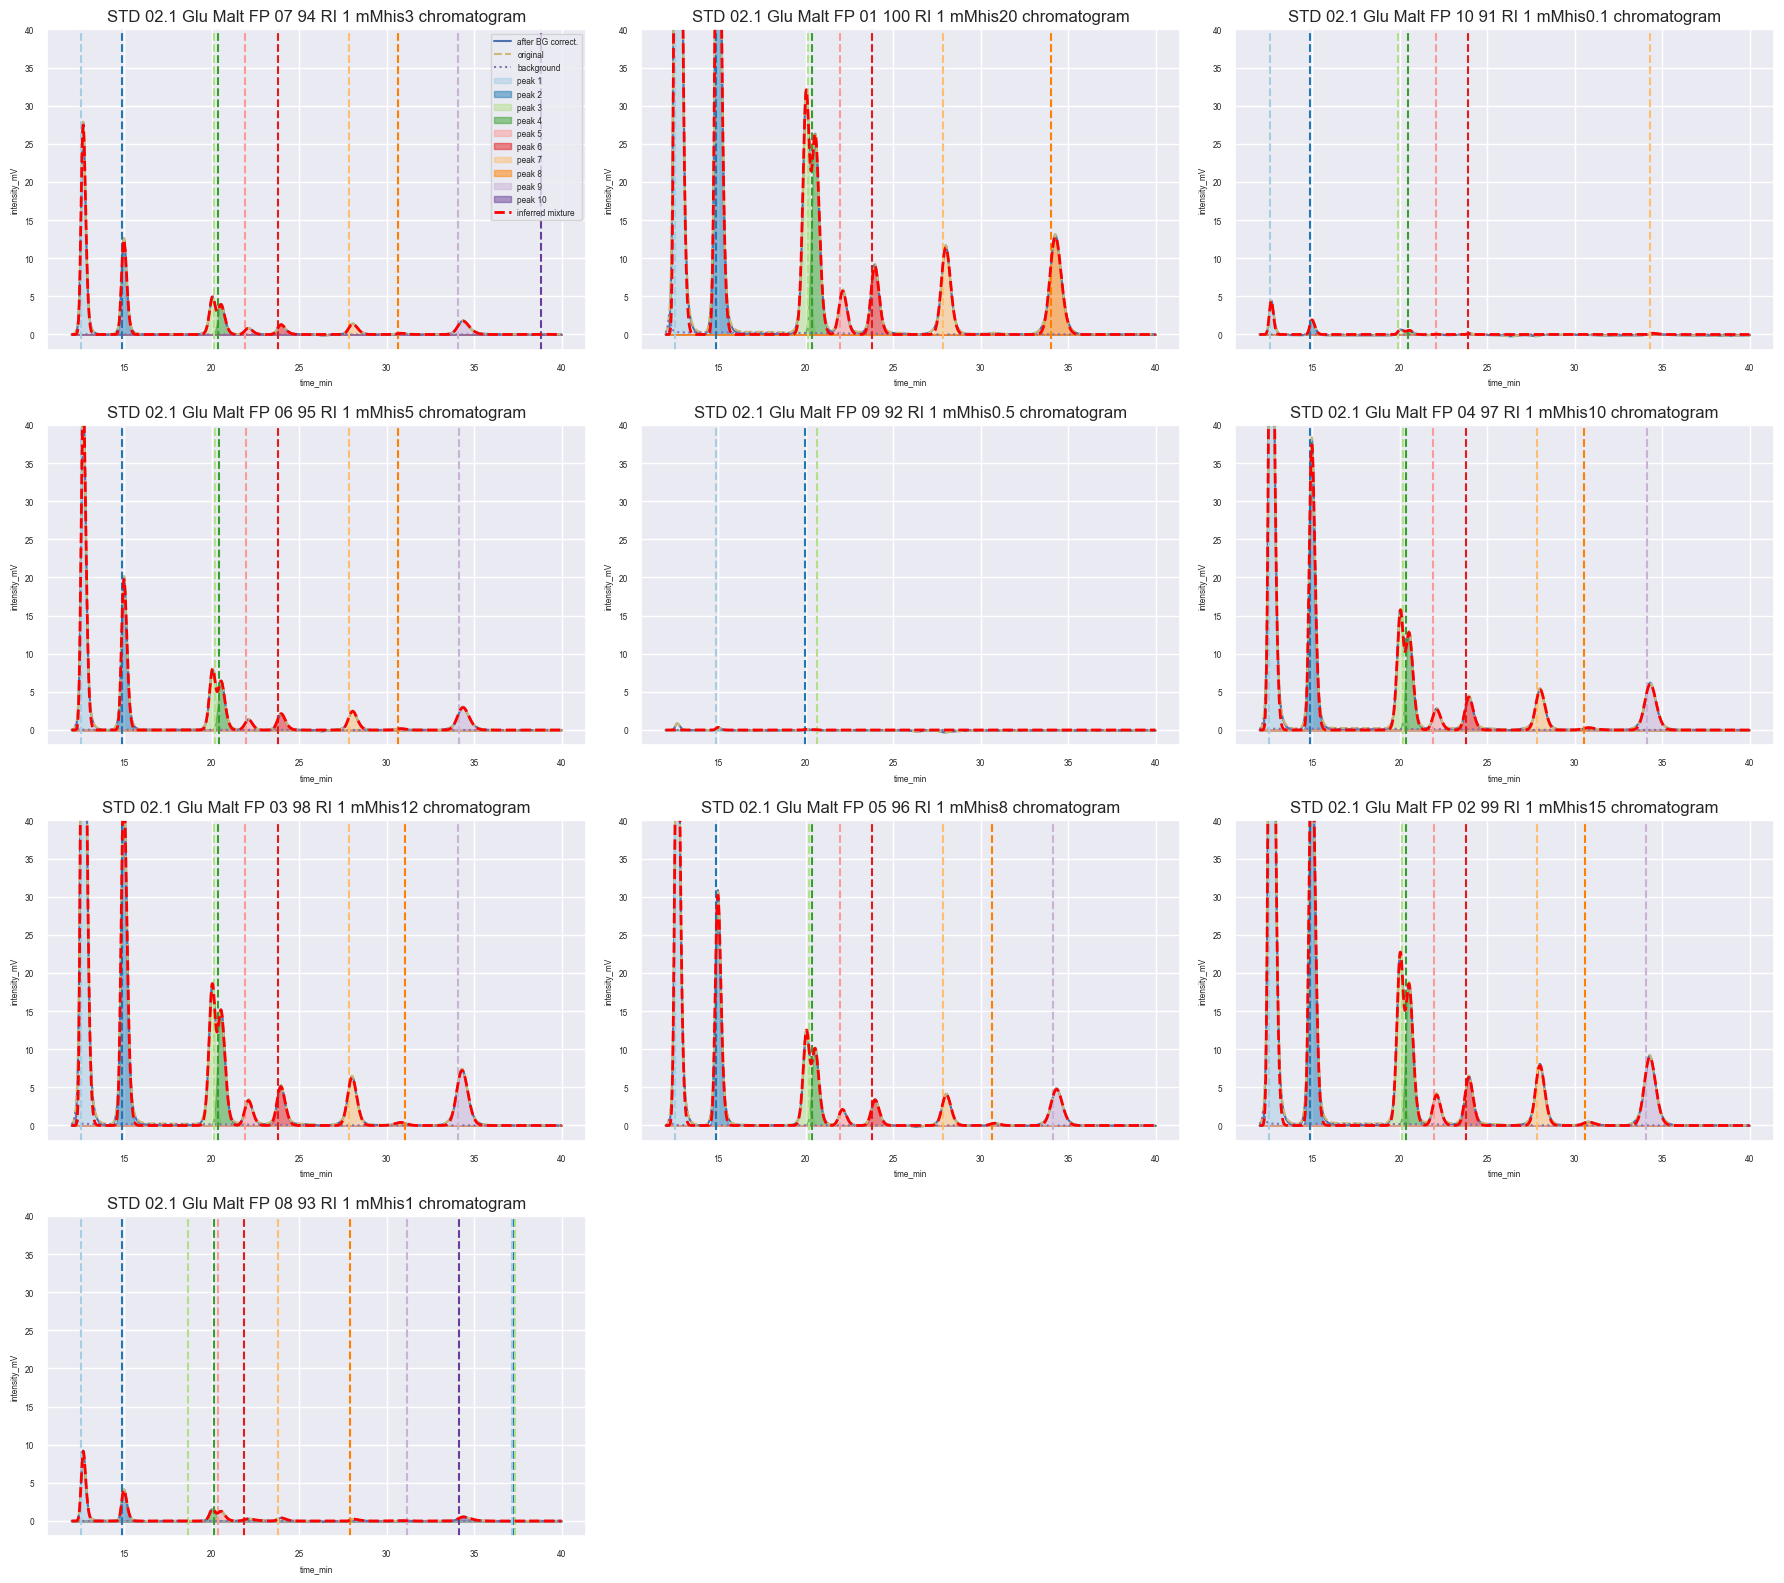

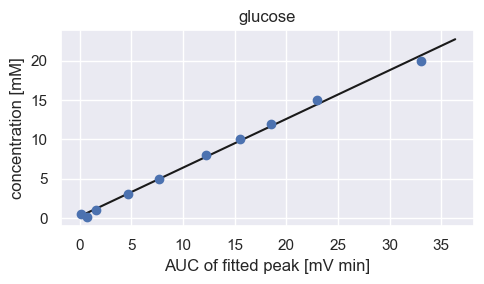

******Calibration curve*****
Calibration for substrate propionate
[27.5, 28]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
6       27.881851                  28.066667  0.353364  1.660821   0.992285   
6       27.842604                  28.016667  0.332505  1.106512   9.078552   
6       27.884900                  28.066667  0.333872  1.294682   1.871020   
6       27.866462                  28.033333  0.333428  1.070512   4.228938   
6       27.861759                  28.033333  0.327789  1.048586   5.091098   
6       27.876419                  28.050000  0.324547  1.147392   3.197332   
6       27.852038                  28.016667  0.331709  1.102345   6.274616   
7       27.937103                  28.116667  0.395549  4.355894   0.147656   

       area  peak_idx                                             sample  
6  0.843964         7  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
6  7.566658         7  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
6  1.565843         7  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
6  3.534463         7  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
6  4.183072         7  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
6  2.601091         7  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
6  5.217162         7  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
7  0.137310         8  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 2.58876976743814
Intercept: 0.9498979908269689
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


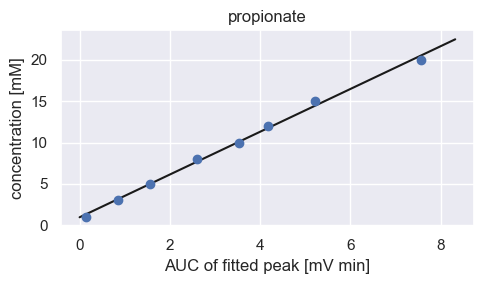

******Calibration curve*****
Calibration for substrate succinate
[19.5, 20.2]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
2       20.169240                  20.050000  0.213771 -1.106961   3.909117   
2       20.152776                  20.033333  0.225005 -1.050885  25.323953   
2       19.917853                  20.066667  0.283664  2.809172   0.401643   
2       20.177850                  20.066667  0.218822 -1.122070   6.307584   
1       19.945797                  20.066667  0.225051  3.388475   0.052665   
2       20.172089                  20.050000  0.230327 -1.223762  12.026972   
2       20.165864                  20.050000  0.230172 -1.198572  14.252379   
2       20.174185                  20.050000  0.226045 -1.194932   9.629092   
2       20.159887                  20.050000  0.227858 -1.129581  17.684213   
3       20.143305                  20.066667  0.189358 -0.718663   1.387321   

        area  peak_idx                                             sample  
2   2.094679         3  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
2  14.282799         3  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
2   0.285585         3  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
2   3.459747         3  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
1   0.029710         2  STD_02.1_Glu_Malt_FP_09_92_RI_1_mMhis0.5_chrom...  
2   6.943702         3  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
2   8.222979         3  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
2   5.455940         3  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
2  10.100411         3  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
3   0.658494         4  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 1.423080577449393
Intercept: 0.1262902108989037
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


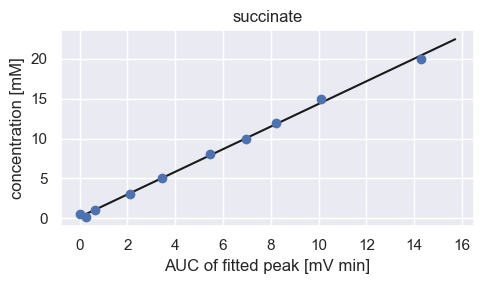

******Calibration curve*****
Calibration for substrate lactate
[20.2, 20.8]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
3       20.392552                  20.550000  0.282992  1.787552   2.710490   
3       20.398066                  20.550000  0.292434  1.427485  19.268747   
3       20.465668                  20.550000  0.221160  1.258242   0.374990   
3       20.400423                  20.550000  0.283070  1.740919   4.436769   
2       20.644305                  20.533333  0.167026 -2.289098   0.030008   
3       20.388468                  20.550000  0.291508  1.672849   8.948074   
3       20.386476                  20.550000  0.291571  1.616572  10.707741   
3       20.393979                  20.550000  0.284944  1.646894   7.119929   
3       20.390987                  20.550000  0.290820  1.532531  13.337230   
4       20.383568                  20.533333  0.300690  2.008444   0.848701   

        area  peak_idx                                             sample  
3   1.922704         4  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
3  14.124430         4  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
3   0.207881         4  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
3   3.148110         4  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
2   0.012563         3  STD_02.1_Glu_Malt_FP_09_92_RI_1_mMhis0.5_chrom...  
3   6.538370         4  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
3   7.825869         4  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
3   5.085392         4  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
3   9.722528         4  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
4   0.639681         5  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 1.448009000537077
Intercept: 0.33180975843543514
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


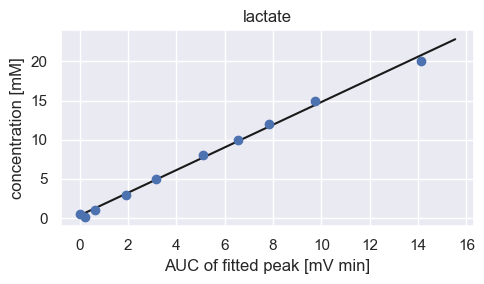

******Calibration curve*****
Calibration for substrate butyrate
[33.5, 35]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
8       34.110722                  34.383333  0.480688  1.758163   1.229019   
7       34.055458                  34.266667  0.419532  1.220968   9.948893   
6       34.292778                  34.466667  0.346327  2.935317   0.099521   
8       34.137991                  34.366667  0.432473  1.288853   2.249756   
8       34.123362                  34.333333  0.403801  1.044374   4.872145   
8       34.110344                  34.316667  0.402829  1.056694   5.827900   
8       34.145470                  34.350000  0.396219  1.004817   3.876980   
8       34.090184                  34.300000  0.408047  1.102847   7.146779   
9       34.122359                  34.400000  0.542753  2.371159   0.344955   

        area  peak_idx                                             sample  
8   1.480852         9  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
7  10.462353         8  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
6   0.086396         7  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
8   2.438846         9  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
8   4.931482         9  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
8   5.884681         9  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
8   3.850515         9  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
8   7.309889         9  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
9   0.469304        10  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 1.9525106522023759
Intercept: 0.22493346233073908
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


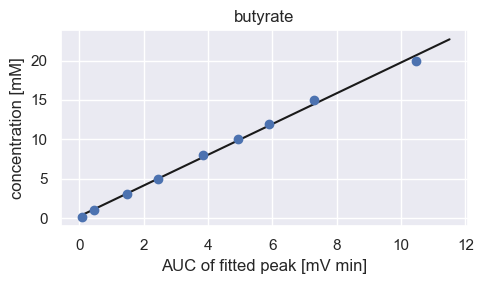

******Calibration curve*****
Calibration for substrate acetate
[23.7, 24.2]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
5       23.794338                  23.983333  0.338825  1.830036   0.884155   
5       23.797122                  23.966667  0.302371  1.265900   6.884381   
5       23.888578                  24.000000  0.206180  1.824913   0.088384   
5       23.810463                  23.983333  0.315264  1.501052   1.555053   
5       23.798954                  23.966667  0.312535  1.303183   3.271233   
5       23.794211                  23.966667  0.311615  1.316082   3.865632   
5       23.808247                  23.966667  0.303994  1.366490   2.520634   
5       23.797473                  23.966667  0.304561  1.252987   4.861998   
6       23.808143                  24.000000  0.345152  1.944909   0.272883   

       area  peak_idx                                             sample  
5  0.750902         6  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
5  5.204431         6  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
5  0.045678         6  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
5  1.228850         6  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
5  2.556164         6  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
5  3.012335         6  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
5  1.920714         6  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
5  3.706828         6  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
6  0.236007         7  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


Slope: 3.8945994889330273
Intercept: 0.15770385377927987
Calibration curve saved as: calibration.json


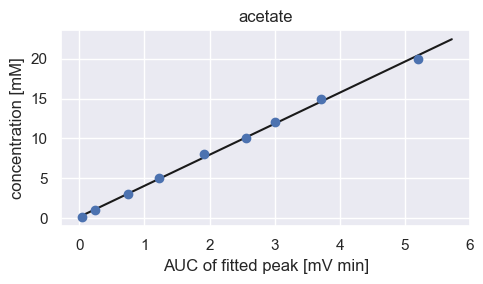

******Calibration curve*****
Calibration for substrate formate
[21.0, 22.5]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
4       21.937140                  22.100000  0.311510  1.687603   0.587353   
4       21.972848                  22.133333  0.292641  1.194554   4.436505   
4       22.075064                  22.116667  0.093575  0.740496   0.042643   
4       21.972563                  22.116667  0.275130  1.135254   1.079658   
4       21.942355                  22.116667  0.313474  1.444751   2.011768   
4       21.942140                  22.116667  0.312653  1.420284   2.419463   
4       21.965668                  22.116667  0.278924  1.221528   1.634723   
4       21.960954                  22.116667  0.293908  1.223514   3.104871   
5       21.857649                  22.116667  0.499608  2.947674   0.170327   

       area  peak_idx                                             sample  
4  0.458629         5  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
4  3.254360         5  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
4  0.010002         5  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
4  0.744585         5  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
4  1.580774         5  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
4  1.896143         5  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
4  1.142931         5  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
4  2.287413         5  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
5  0.213307         6  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 6.255337440640138
Intercept: 0.17913768340117642
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


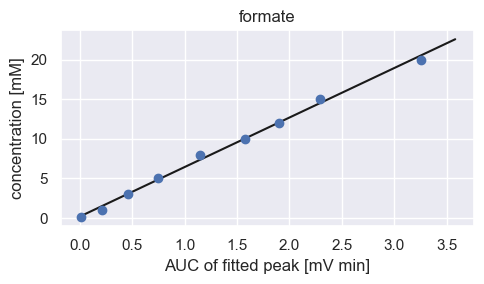

******Calibration curve*****
Calibration for substrate maltose
[12.5, 13]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  amplitude  \
0       12.565231                  12.666667  0.189170  1.706511  19.342119   
0       12.544826                  12.683333  0.255804  2.425717  99.302741   
0       12.594715                  12.666667  0.150145  1.158557   3.495998   
0       12.566136                  12.683333  0.200558  1.794055  29.884456   
0       12.548953                  12.666667  0.225419  1.961835  53.647218   
0       12.542508                  12.666667  0.236976  2.485992  59.473073   
0       12.553804                  12.666667  0.216111  1.887903  44.241541   
0       12.542805                  12.666667  0.241208  2.048236  74.356806   
0       12.565832                  12.666667  0.194600  1.945061   6.189408   

        area  peak_idx                                             sample  
0   9.149319         1  STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...  
0  57.576912         1  STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...  
0   0.774650         1  STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...  
0  14.962530         1  STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...  
0  30.312861         1  STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...  
0  31.997062         1  STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...  
0  23.966038         1  STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...  
0  44.957529         1  STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...  
0   3.019133         1  STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...

Slope: 0.34746347638125014
Intercept: -0.13343406597518204
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


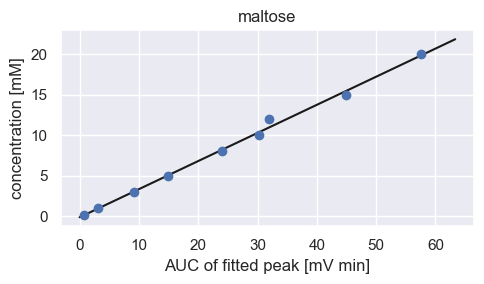

In [22]:
substratelist=["glucose","propionate","succinate","lactate","butyrate","acetate","formate","maltose"]
timewindows=[[14.8,15.5],[27.5,28],[19.5,20.2], [20.2,20.8],[33.5,35],[23.7,24.2],[21.0,22.5],[12.5,13]]
date=2308
runc="data_hplcrawdata/Zur_Newcalibration_June2023"

#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=None #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
plot_time_window=None #[12,25]
cremerlab.hplc.run_calibration(runc,substratelist,timewindows,analysis_window=analysis_window,date=date,list_samplenames=None, name_prefix="YCA_Zurich",filename_settings="hplc_settings_calibration_Zurich.csv",output_json='calibration.json',save_full_calibrationcurve='data_calibration',plot_time_window=plot_time_window, plot_upper_limit=40,plot_lower_limit=-2)

# Stanford calibration runs

Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 73.71it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...:   0%|                                                                                                      | 0/6 [00:00<?, ?it/s]/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:614: PeakPropertyWarning: some peaks have a prominence of 0
  out = scipy.signal.peak_widths(intensity, peaks,
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/c

retention_time  retention_time_firstguess     scale      skew  \
0        12.235214                   12.22500  0.131270 -0.098198   
1        13.175961                   13.34167  0.298663  1.898518   
2        15.493283                   15.66667  0.313367  1.717796   
3        17.745003                   17.80000  2.884841 -5.632927   
4        18.669021                   18.72500  0.239361 -0.000029   
..             ...                        ...       ...       ...   
7        22.620142                   22.93333  0.517482  2.099587   
8        24.786684                   24.77500  0.360693 -0.000006   
9        28.520670                   28.83333  0.535797  1.874463   
10       31.161747                   31.69167  0.936729  1.375685   
11       34.660609                   35.13333  0.795003  1.990577   

       amplitude          area  peak_idx                                sample  
0      90.385028     28.552370         1  230718_glu10_mal5_scfa5_chromatogram  
1   23639.314633  17697.281496         2  230718_glu10_mal5_scfa5_chromatogram  
2   18507.230866  14537.312684         3  230718_glu10_mal5_scfa5_chromatogram  
3      99.433766    685.755870         4  230718_glu10_mal5_scfa5_chromatogram  
4     385.107521    231.060290         5  230718_glu10_mal5_scfa5_chromatogram  
..           ...           ...       ...                                   ...  
7     145.029928    188.123274         8   230718_glu3_mal1_scfa1_chromatogram  
8     317.615707    287.164129         9   230718_glu3_mal1_scfa1_chromatogram  
9     286.857840    382.989774        10   230718_glu3_mal1_scfa1_chromatogram  
10    118.029945    270.187741        11   230718_glu3_mal1_scfa1_chromatogram  
11    302.375754    602.562554        12   230718_glu3_mal1_scfa1_chromatogram  

[74 rows x 8 columns]

******Calibration curve*****
Calibration for substrate glucose
[14.8, 15.5]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
2       15.493283                   15.66667  0.313367  1.717796   
2       15.490202                   15.66667  0.313989  1.730576   
2       15.492104                   15.66667  0.312335  1.698903   
2       15.495414                   15.66667  0.313420  1.726638   
2       15.499985                   15.67500  0.313684  1.734579   
2       15.491311                   15.66667  0.313483  1.704986   

      amplitude          area  peak_idx  \
2  18507.230866  14537.312684         3   
2   9248.294793   7278.899606         3   
2   1695.479056   1327.403646         3   
2  27754.431483  21804.614147         3   
2  36720.287416  28872.801341         3   
2   5671.113444   4456.277903         3   

                                    sample  
2     230718_glu10_mal5_scfa5_chromatogram  
2      230718_glu5_mal3_scfa3_chromatogram  
2  230718_glu1_mal0.5_scfa0.5_chromatogram  
2     230718_glu15_mal8_scfa8_chromatogram  
2   230718_glu20_mal10_scfa10_chromatogram  
2      230718_glu3_mal1_scfa1_chromatogram

Slope: 0.0006910038033613211
Intercept: -0.014986410248768678
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


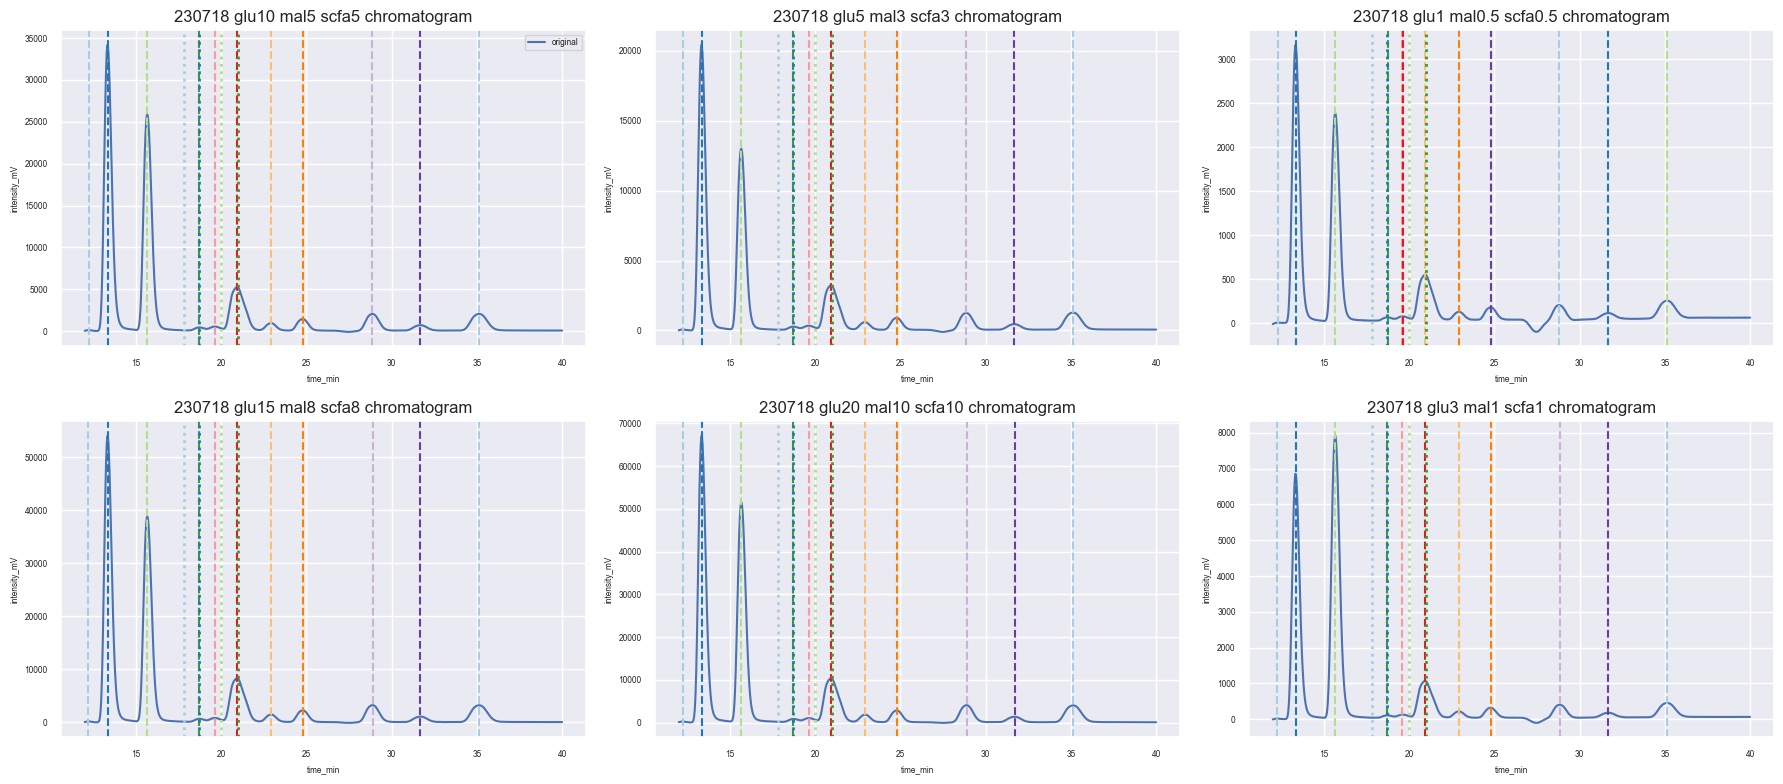

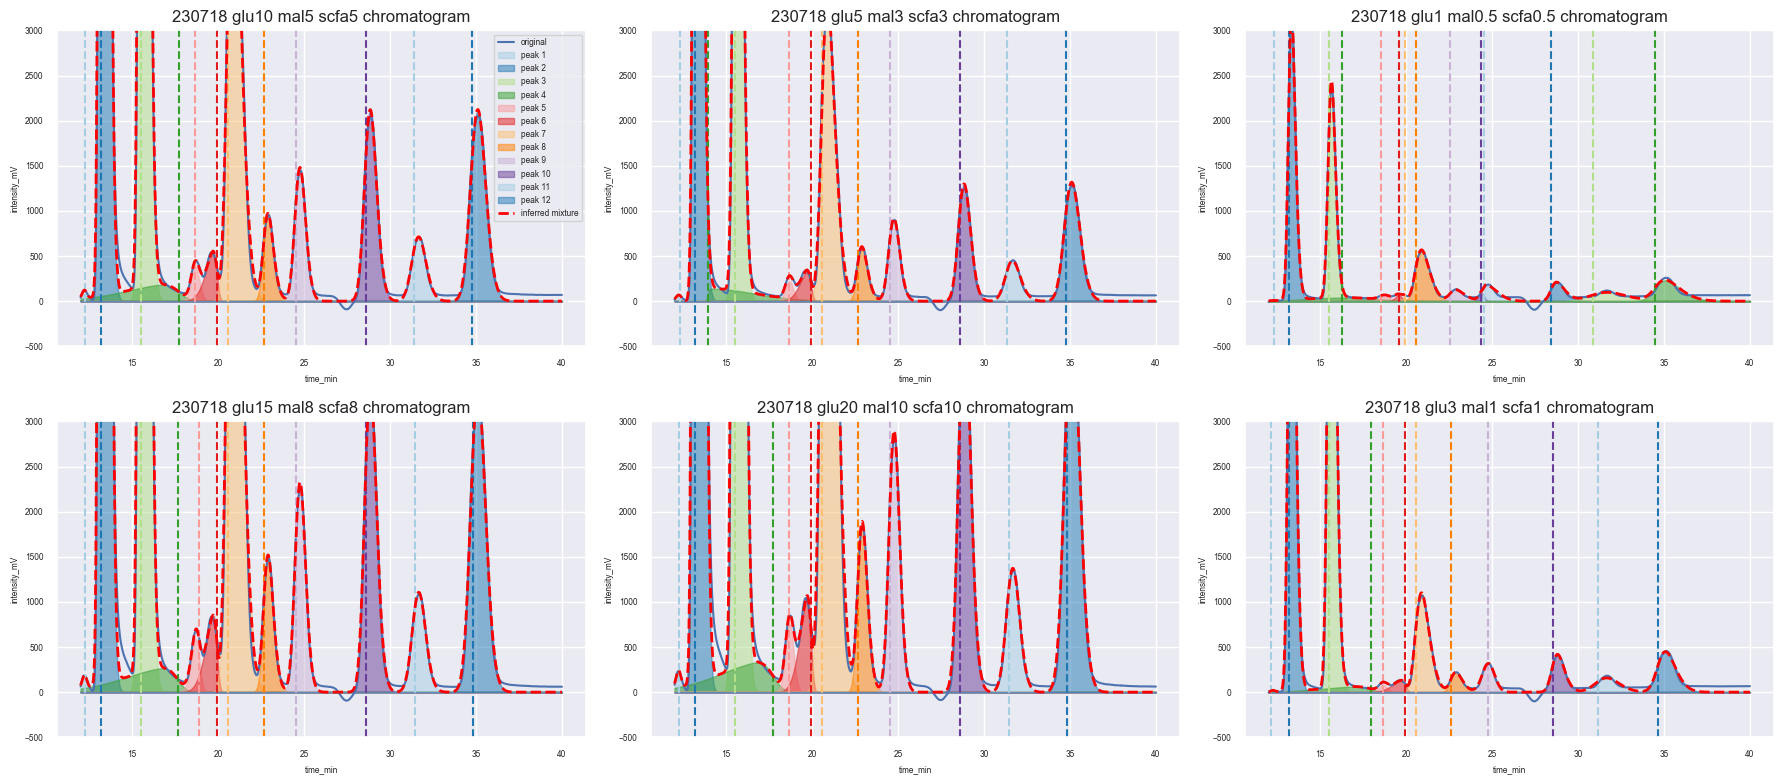

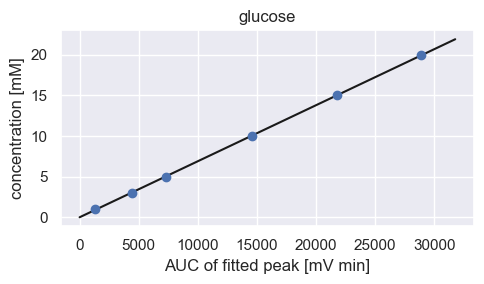

******Calibration curve*****
Calibration for substrate propionate
[27, 28.8]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
9        28.593221                   28.87500  0.473582  1.367543   
9        28.587929                   28.85833  0.472315  1.368131   
11       28.437619                   28.78333  0.641237  2.701937   
9        28.608778                   28.88333  0.462605  1.294843   
9        28.612467                   28.88333  0.460691  1.277368   
9        28.520670                   28.83333  0.535797  1.874463   

      amplitude         area  peak_idx  \
9   1594.922567  1893.324917        10   
9    975.936390  1147.379390        10   
11   130.777306   207.920306        12   
9   2571.389087  2981.724599        10   
9   3221.237280  3719.823912        10   
9    286.857840   382.989774        10   

                                     sample  
9      230718_glu10_mal5_scfa5_chromatogram  
9       230718_glu5_mal3_scfa3_chromatogram  
11  230718_glu1_mal0.5_scfa0.5_chromatogram  
9      230718_glu15_mal8_scfa8_chromatogram  
9    230718_glu20_mal10_scfa10_chromatogram  
9       230718_glu3_mal1_scfa1_chromatogram

Slope: 0.0027024901932783557
Intercept: -0.07087856563682404
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


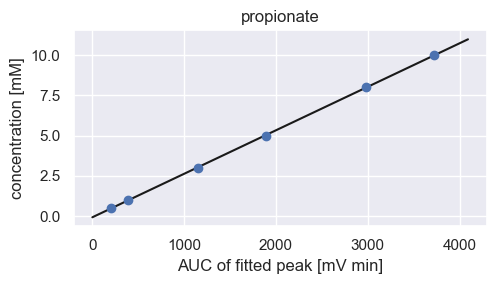

******Calibration curve*****
Calibration for substrate succinate
[19.6, 20.2]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew   amplitude  \
5       19.934768                   19.61667  0.576761 -4.352471  311.871497   
5       19.929629                   19.61667  0.559688 -4.195528  188.082028   
6       19.909026                   19.66667  0.134429 -0.000001   40.000526   
5       19.937438                   19.62500  0.586377 -4.557684  477.234932   
5       19.937901                   19.63333  0.558577 -4.270288  603.424616   
5       19.964512                   19.60833  0.687671 -5.113728   72.280939   

         area  peak_idx                                   sample  
5  450.880491         6     230718_glu10_mal5_scfa5_chromatogram  
5  263.865627         6      230718_glu5_mal3_scfa3_chromatogram  
6   13.478713         7  230718_glu1_mal0.5_scfa0.5_chromatogram  
5  701.453191         6     230718_glu15_mal8_scfa8_chromatogram  
5  844.882443         6   230718_glu20_mal10_scfa10_chromatogram  
5  124.593214         6      230718_glu3_mal1_scfa1_chromatogram

Slope: 0.011663096015202868
Intercept: -0.08025995268001296
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


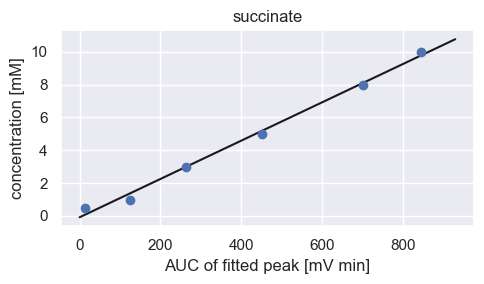

******Calibration curve*****
Calibration for substrate lactate
[20.2, 20.8]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew    amplitude  \
6       20.584907                   20.93333  0.590308  2.111822  3603.871690   
6       20.583140                   20.93333  0.591180  2.117850  2210.335180   
7       20.568509                   20.93333  0.636738  2.282138   366.941721   
6       20.586595                   20.93333  0.589763  2.119107  5699.826852   
6       20.588688                   20.93333  0.590696  2.127714  7095.860815   
6       20.577647                   20.94167  0.608449  2.154097   725.521741   

           area  peak_idx                                   sample  
6   5332.583191         7     230718_glu10_mal5_scfa5_chromatogram  
6   3275.426658         7      230718_glu5_mal3_scfa3_chromatogram  
7    585.662942         8  230718_glu1_mal0.5_scfa0.5_chromatogram  
6   8426.141017         7     230718_glu15_mal8_scfa8_chromatogram  
6  10506.529648         7   230718_glu20_mal10_scfa10_chromatogram  
6   1106.534116         7      230718_glu3_mal1_scfa1_chromatogram

Slope: 0.0009584216458847382
Intercept: -0.08623710607193225
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


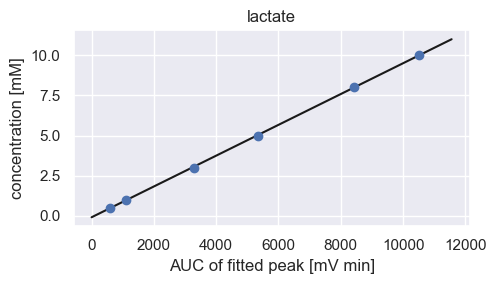

******Calibration curve*****
Calibration for substrate butyrate
[33.5, 35]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
11       34.793726                   35.12500  0.581890  1.277129   
11       34.774649                   35.12500  0.604480  1.360274   
13       34.485129                   35.13333  1.174706  2.517978   
11       34.808963                   35.13333  0.564318  1.223354   
11       34.810388                   35.13333  0.561192  1.212850   
11       34.660609                   35.13333  0.795003  1.990577   

      amplitude         area  peak_idx  \
11  1627.664071  2374.080771        12   
11   992.153421  1503.318205        12   
13   146.537745   426.398926        14   
11  2593.215664  3668.197005        12   
11  3231.015501  4545.067420        12   
11   302.375754   602.562554        12   

                                     sample  
11     230718_glu10_mal5_scfa5_chromatogram  
11      230718_glu5_mal3_scfa3_chromatogram  
13  230718_glu1_mal0.5_scfa0.5_chromatogram  
11     230718_glu15_mal8_scfa8_chromatogram  
11   230718_glu20_mal10_scfa10_chromatogram  
11      230718_glu3_mal1_scfa1_chromatogram

Slope: 0.0022975948694738315
Intercept: -0.4405971355600551
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


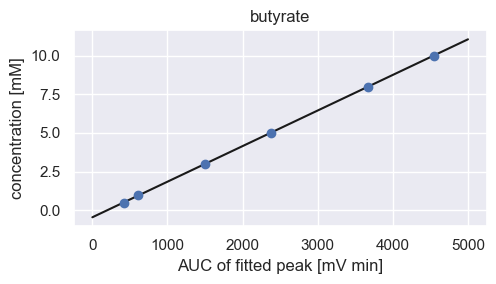

******Calibration curve*****
Calibration for substrate acetate
[23.7, 24.8]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
8        24.541216                   24.78333  0.412564  1.278428   
8        24.527970                   24.78333  0.425728  1.355263   
9        24.375895                   24.77500  0.165461 -0.000221   
10       24.531696                   24.80833  0.721534  6.894190   
8        24.555862                   24.78333  0.398025  1.202203   
8        24.559923                   24.78333  0.395721  1.191776   
8        24.786684                   24.77500  0.360693 -0.000006   

      amplitude         area  peak_idx  \
8   1134.930306  1173.682793         9   
8    691.040671   737.438714         9   
9     92.000000    38.157028        10   
10    92.000000   166.376942        11   
8   1813.483543  1809.314793         9   
8   2264.102046  2245.821718         9   
8    317.615707   287.164129         9   

                                     sample  
8      230718_glu10_mal5_scfa5_chromatogram  
8       230718_glu5_mal3_scfa3_chromatogram  
9   230718_glu1_mal0.5_scfa0.5_chromatogram  
10  230718_glu1_mal0.5_scfa0.5_chromatogram  
8      230718_glu15_mal8_scfa8_chromatogram  
8    230718_glu20_mal10_scfa10_chromatogram  
8       230718_glu3_mal1_scfa1_chromatogram

Slope: 0.004455669629135061
Intercept: -0.11064556256836244
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


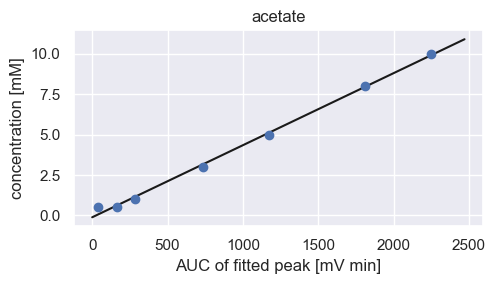

******Calibration curve*****
Calibration for substrate formate
[20.5, 22.5]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew    amplitude  \
6       20.584907                   20.93333  0.590308  2.111822  3603.871690   
6       20.583140                   20.93333  0.591180  2.117850  2210.335180   
7       20.568509                   20.93333  0.636738  2.282138   366.941721   
6       20.586595                   20.93333  0.589763  2.119107  5699.826852   
6       20.588688                   20.93333  0.590696  2.127714  7095.860815   
6       20.577647                   20.94167  0.608449  2.154097   725.521741   

           area  peak_idx                                   sample  
6   5332.583191         7     230718_glu10_mal5_scfa5_chromatogram  
6   3275.426658         7      230718_glu5_mal3_scfa3_chromatogram  
7    585.662942         8  230718_glu1_mal0.5_scfa0.5_chromatogram  
6   8426.141017         7     230718_glu15_mal8_scfa8_chromatogram  
6  10506.529648         7   230718_glu20_mal10_scfa10_chromatogram  
6   1106.534116         7      230718_glu3_mal1_scfa1_chromatogram

Slope: 0.0009584216458847382
Intercept: -0.08623710607193225
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


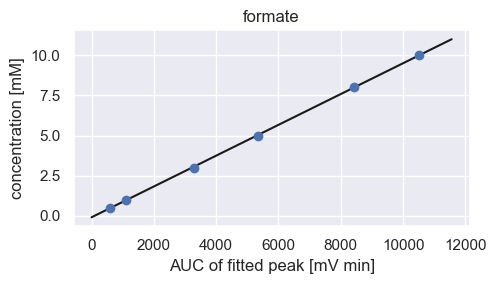

******Calibration curve*****
Calibration for substrate maltose
[12.5, 13.8]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
1       13.175961                   13.34167  0.298663  1.898518   
1       13.174385                   13.34167  0.298695  1.874512   
1       13.174355                   13.34167  0.299038  1.869937   
1       13.178128                   13.34167  0.298753  1.917881   
1       13.182318                   13.34167  0.298877  1.927140   
1       13.174025                   13.34167  0.299052  1.874181   

      amplitude          area  peak_idx  \
1  23639.314633  17697.281496         2   
1  14194.642322  10627.773999         2   
1   2192.099775   1643.147681         2   
1  37238.664660  27886.633323         2   
1  46222.600413  34628.784233         2   
1   4757.339438   3566.161941         2   

                                    sample  
1     230718_glu10_mal5_scfa5_chromatogram  
1      230718_glu5_mal3_scfa3_chromatogram  
1  230718_glu1_mal0.5_scfa0.5_chromatogram  
1     230718_glu15_mal8_scfa8_chromatogram  
1   230718_glu20_mal10_scfa10_chromatogram  
1      230718_glu3_mal1_scfa1_chromatogram

Slope: 0.0002882773771007794
Intercept: -0.03149657001371331


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


Calibration curve saved as: calibration.json


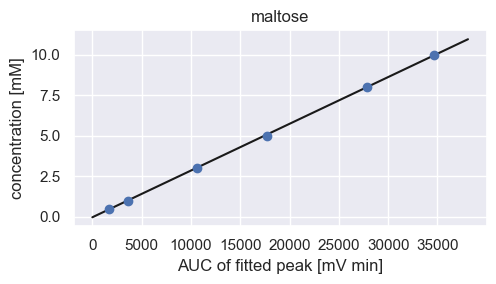

******Calibration curve*****
Calibration for substrate ethanol
[31, 33]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
10       31.376726                   31.69167  0.535322  1.243624   
10       31.335295                   31.69167  0.587106  1.413539   
10       31.424217                   31.69167  0.484239  1.054808   
10       31.425050                   31.70833  0.483543  1.076335   
10       31.161747                   31.69167  0.936729  1.375685   

      amplitude         area  peak_idx                                  sample  
10   550.388637   737.712147        11    230718_glu10_mal5_scfa5_chromatogram  
10   333.150029   489.567548        11     230718_glu5_mal3_scfa3_chromatogram  
10   894.295159  1084.505523        11    230718_glu15_mal8_scfa8_chromatogram  
10  1103.286960  1337.252009        11  230718_glu20_mal10_scfa10_chromatogram  
10   118.029945   270.187741        11     230718_glu3_mal1_scfa1_chromatogram

Slope: 0.008424947292140302
Intercept: -1.203852755208306
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


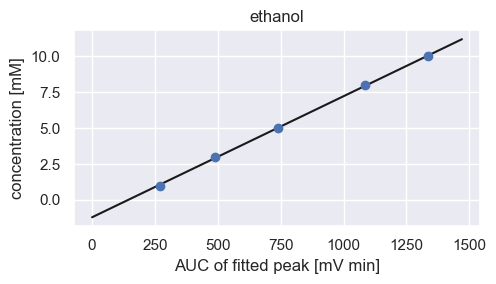

In [41]:
# calibration in water

#foldername='data_hplcrawdata/Stan_calibration_water_scfa_glu_mal_2.5mM'
#cremerlab.hplc.generate_setting_template(foldername,output="hplc_settings_template1.csv",hplc_machine="Shimadzu_ProminenceLC2030C") 

foldername="data_hplcrawdata/Stan_calibration_water_scfa_glu_mal_2.5mM"
filename_settings="hplc_settings_calibration.csv"
date="2307"
name_prefix="Stan_water"

substratelist=["glucose","propionate","succinate","lactate","butyrate","acetate","formate","maltose","ethanol"]
timewindows=[[14.8,15.5],[27,28.8],[19.6,20.2], [20.2,20.8],[33.5,35],[23.7,24.8],[20.5,22.5],[12.5,13.8],[31,33]]

#orevious for glu and maltose
#timewindows=[[15.3,15.6],[13.3,13.7]

#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=None#[17.8,18.7,20.,21.]#[] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=None,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)



# N-C- different sugars 

Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.60it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...:  20%|██████████████████▊                                                                           | 1/5 [01:05<04:21, 65.49s/it]/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:614: PeakPropertyWarning: some peaks have a prominence of 0
  out = scipy.signal.peak_widths(intensity, peaks,
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/c

retention_time  retention_time_firstguess     scale      skew  \
0       13.170699                   13.44167  0.580862  3.823645   
1       14.447679                   14.25000  0.353635 -3.022817   
2       15.532305                   15.70000  0.311395  1.624296   
3       16.524308                   16.71667  0.338409  1.935534   
4       17.296482                   17.45833  0.336219  1.549444   
0       13.184709                   13.50000  0.640460  3.365491   
1       14.471677                   14.26667  0.406578 -3.690696   
2       15.530012                   15.70000  0.313367  1.610553   
3       16.525882                   16.71667  0.330966  1.835371   
4       17.294772                   17.45833  0.333735  1.496444   
0       13.172987                   13.47500  0.606176  3.798568   
1       14.460697                   14.26667  0.371523 -3.260815   
2       15.532434                   15.70000  0.311668  1.614696   
3       16.525090                   16.71667  0.337152  1.914720   
4       17.296672                   17.45833  0.335587  1.540242   
0       13.213603                   13.50000  0.651798  2.778089   
1       14.478973                   14.27500  0.422342 -3.857001   
2       15.527790                   15.69167  0.316551  1.519900   
3       16.526278                   16.70833  0.328786  1.724542   
4       17.295335                   17.45000  0.329506  1.418935   
0       13.267624                   13.50000  0.631538  2.172598   
1       14.479180                   14.27500  0.418939 -3.815199   
2       15.530989                   15.69167  0.314098  1.294810   
3       16.551499                   16.70833  0.288836  1.160036   
4       17.295258                   17.44167  0.320417  1.183128   

      amplitude          area  peak_idx  \
0  28931.472325  42124.355592         1   
1  39854.146231  35327.991703         2   
2  18996.594117  14827.815498         3   
3  12507.747309  10609.891539         4   
4  14645.498980  12342.873624         5   
0  17841.405829  28642.515362         1   
1  39647.550242  40406.348255         2   
2   9188.939756   7217.851596         3   
3   6017.874533   4992.477968         4   
4   7565.044608   6328.527557         5   
0  24886.325767  37813.684860         1   
1  39743.543972  37011.995559         2   
2  14790.333878  11554.739761         3   
3  10005.475979   8455.768930         4   
4  11795.168509   9921.989127         5   
0  14607.024850  23865.180504         1   
1  39969.363537  42313.789665         2   
2   3785.990476   3004.096029         3   
3   2555.143588   2105.809559         4   
4   3023.866400   2497.555868         5   
0  14189.947736  22463.121778         1   
1  40070.955288  42079.514301         2   
2   2196.320780   1729.224556         3   
3   1428.367357   1034.144514         4   
4   1730.213220   1389.647207         5   

                                              sample  
0  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
1  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
2  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
3  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
4  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
0   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
1   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
2   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
3   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
4   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
0   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
1   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
2   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
3   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
4   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
0   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
1   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
2   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
3   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
4   N-C-_230630

******Calibration curve*****
Calibration for substrate glucose
[15.3, 15.6]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
2       15.532305                   15.70000  0.311395  1.624296   
2       15.530012                   15.70000  0.313367  1.610553   
2       15.532434                   15.70000  0.311668  1.614696   
2       15.527790                   15.69167  0.316551  1.519900   
2       15.530989                   15.69167  0.314098  1.294810   

      amplitude          area  peak_idx  \
2  18996.594117  14827.815498         3   
2   9188.939756   7217.851596         3   
2  14790.333878  11554.739761         3   
2   3785.990476   3004.096029         3   
2   2196.320780   1729.224556         3   

                                              sample  
2  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
2   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
2   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
2   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
2  N-C-_230630_xyl_sor_glu_1mM_mal_0.5mM_chromato...

Slope: 0.0006894168800808147
Intercept: -0.08558375469112711
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


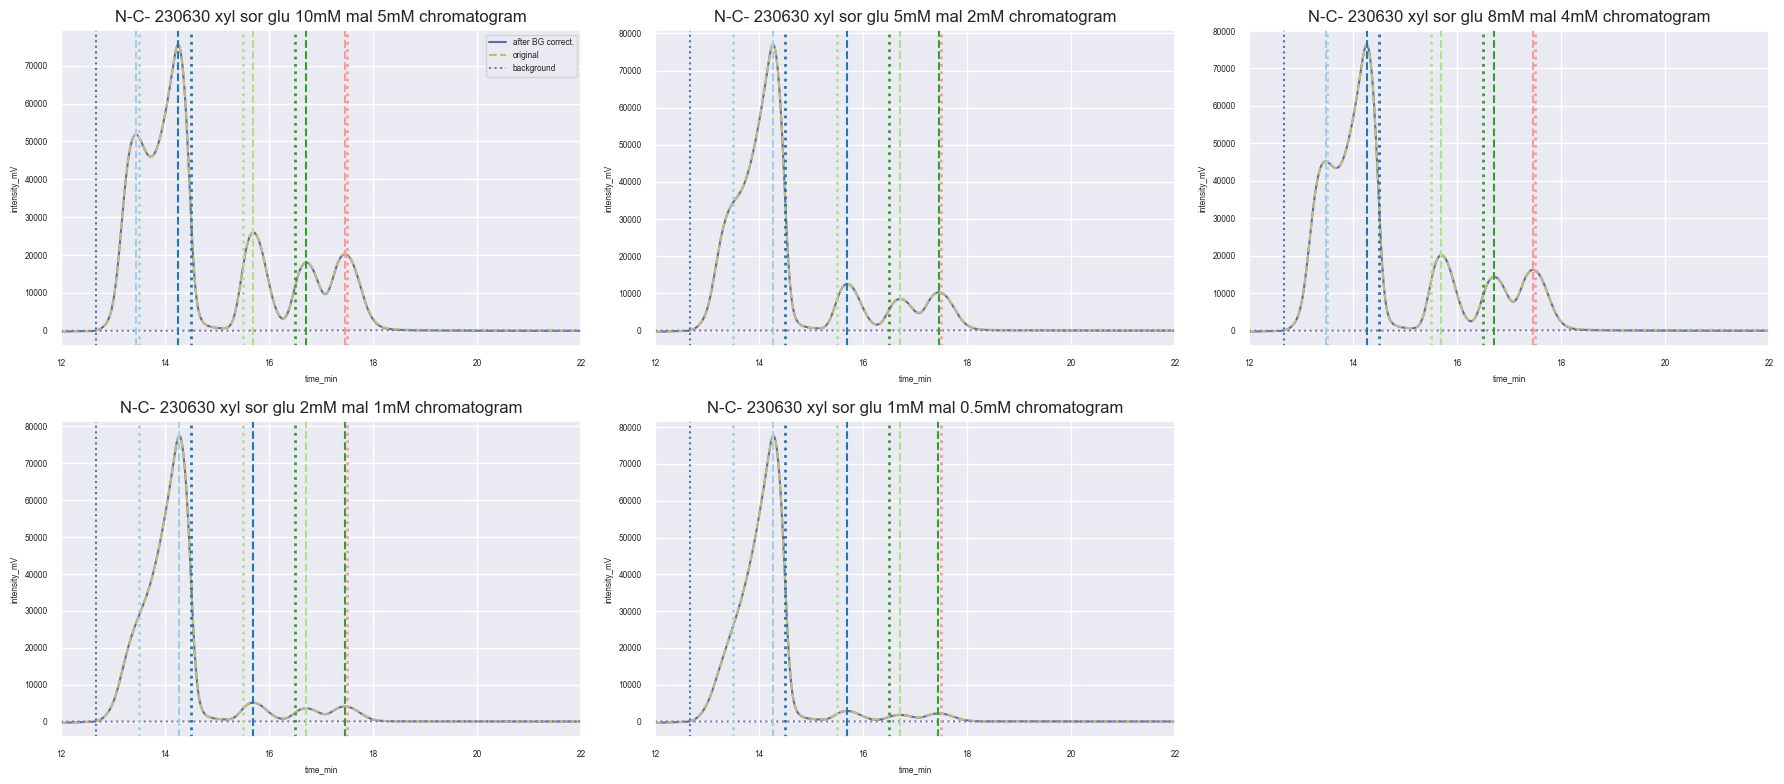

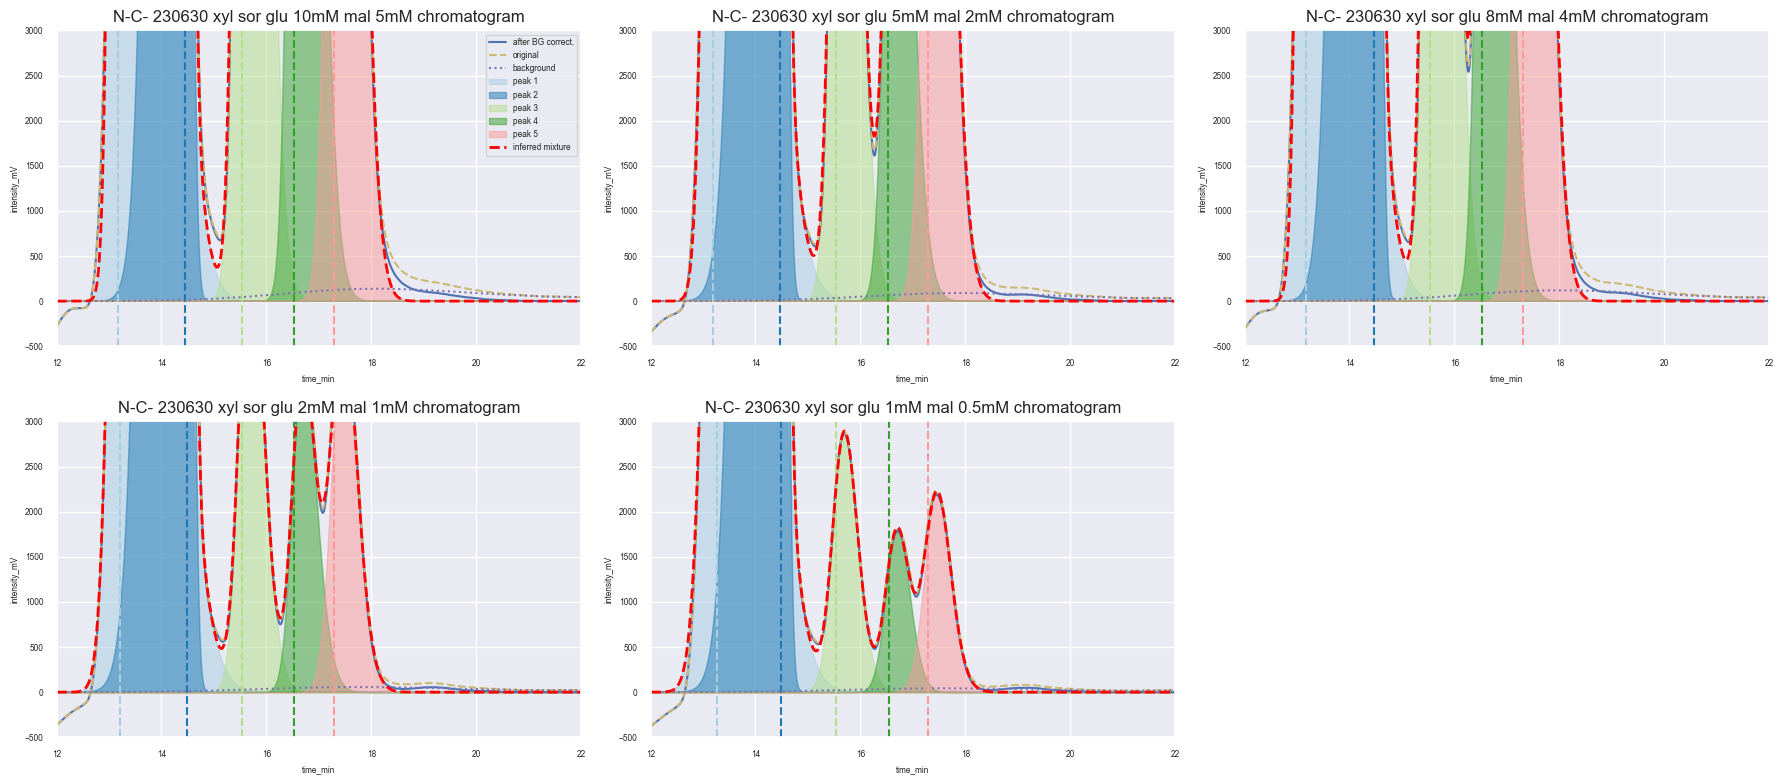

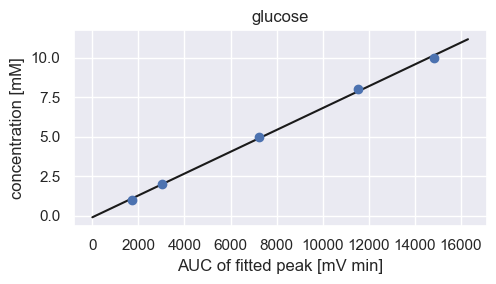

******Calibration curve*****
Calibration for substrate xylose
[16.5, 16.9]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
3       16.524308                   16.71667  0.338409  1.935534   
3       16.525882                   16.71667  0.330966  1.835371   
3       16.525090                   16.71667  0.337152  1.914720   
3       16.526278                   16.70833  0.328786  1.724542   
3       16.551499                   16.70833  0.288836  1.160036   

      amplitude          area  peak_idx  \
3  12507.747309  10609.891539         4   
3   6017.874533   4992.477968         4   
3  10005.475979   8455.768930         4   
3   2555.143588   2105.809559         4   
3   1428.367357   1034.144514         4   

                                              sample  
3  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
3   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
3   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
3   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
3  N-C-_230630_xyl_sor_glu_1mM_mal_0.5mM_chromato...

Slope: 0.0009394727835141761
Intercept: 0.08962646467255997
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


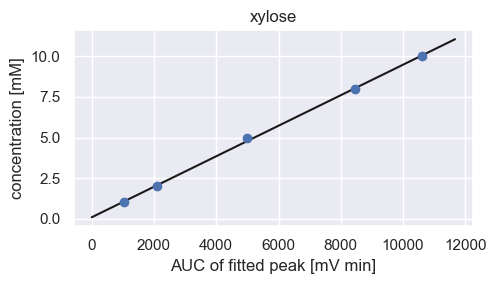

******Calibration curve*****
Calibration for substrate sorbitol
[17.2, 18.3]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
4       17.296482                   17.45833  0.336219  1.549444   
4       17.294772                   17.45833  0.333735  1.496444   
4       17.296672                   17.45833  0.335587  1.540242   
4       17.295335                   17.45000  0.329506  1.418935   
4       17.295258                   17.44167  0.320417  1.183128   

      amplitude          area  peak_idx  \
4  14645.498980  12342.873624         5   
4   7565.044608   6328.527557         5   
4  11795.168509   9921.989127         5   
4   3023.866400   2497.555868         5   
4   1730.213220   1389.647207         5   

                                              sample  
4  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
4   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
4   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
4   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
4  N-C-_230630_xyl_sor_glu_1mM_mal_0.5mM_chromato...

Slope: 0.0008172920801836491
Intercept: -0.10922634654830521
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


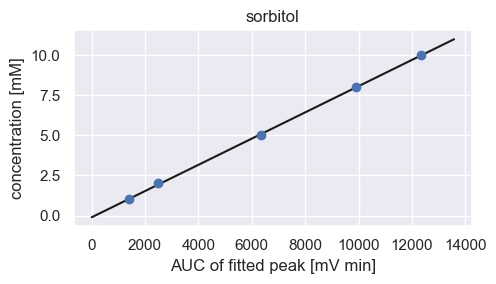

******Calibration curve*****
Calibration for substrate maltose
[13.0, 13.8]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
0       13.170699                   13.44167  0.580862  3.823645   
0       13.184709                   13.50000  0.640460  3.365491   
0       13.172987                   13.47500  0.606176  3.798568   
0       13.213603                   13.50000  0.651798  2.778089   
0       13.267624                   13.50000  0.631538  2.172598   

      amplitude          area  peak_idx  \
0  28931.472325  42124.355592         1   
0  17841.405829  28642.515362         1   
0  24886.325767  37813.684860         1   
0  14607.024850  23865.180504         1   
0  14189.947736  22463.121778         1   

                                              sample  
0  N-C-_230630_xyl_sor_glu_10mM_mal_5mM_chromatogram  
0   N-C-_230630_xyl_sor_glu_5mM_mal_2mM_chromatogram  
0   N-C-_230630_xyl_sor_glu_8mM_mal_4mM_chromatogram  
0   N-C-_230630_xyl_sor_glu_2mM_mal_1mM_chromatogram  
0  N-C-_230630_xyl_sor_glu_1mM_mal_0.5mM_chromato...

Slope: 0.00022364677146707732
Intercept: -4.428973196942072
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


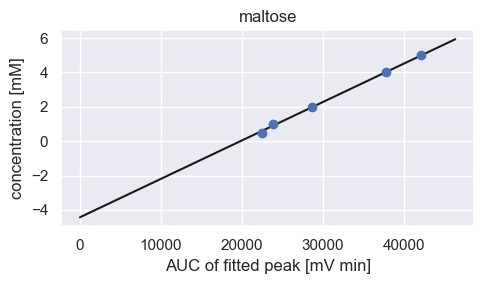

In [30]:
foldername='data_hplcrawdata/Stan_calibration_N-C-_230630_diffsugars'
substratelist=["glucose","xylose","sorbitol","maltose"]
timewindows=[[15.3,15.6],[16.5,16.9],[17.2,18.3],[13.,13.8]]

filename_settings="hplc_settings_calibration.csv"
date="2307"
name_prefix="N-C-"

#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=[12,22] #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=[13.5,14.5,15.5,16.5,17.5] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=1000,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)


# N-C- fructose lactose

In [ ]:
# add calibration runs

foldername='data_hplcrawdata/Stan_calibration_N-C-_230630_frulac'
substratelist=["fructose","lactose"]
timewindows=[[16.9,17.3],[13.5,13.9]]

filename_settings="hplc_settings_calibration.csv"
date="2307"
name_prefix="N-C-"
#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=[13.8,14.4] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=1000,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)


# N-C- succrose

Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.23it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1137: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  #find minimum
Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:22<00:00, 20.66s/it]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1330: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  colorl

retention_time  retention_time_firstguess     scale       skew  \
0       13.206137                   13.46667  0.421276   2.571617   
1       14.468968                   14.26667  0.444721  -3.732502   
2       14.388082                   15.35833  1.392830   2.874587   
0       14.478019                   14.26667  0.737253  -6.692346   
1       14.214114                   15.33333  1.580987  36.587944   
0       13.197704                   13.51667  0.512584   3.058498   
1       14.467840                   14.26667  0.411224  -3.491211   
2       14.408119                   15.35000  1.383311   2.916504   
0       14.500533                   14.26667  0.696020  -6.548703   

      amplitude          area  peak_idx                                 sample  
0  32577.923359  34401.729903         1  N-C-_230630_sucrose_20mM_chromatogram  
1  44140.187431  49205.285743         2  N-C-_230630_sucrose_20mM_chromatogram  
2   6867.724200  23977.335074         3  N-C-_230630_sucrose_20mM_chromatogram  
0  40604.700066  74981.201390         1  N-C-_230630_sucrose_10mM_chromatogram  
1   3218.256518  12753.781685         2  N-C-_230630_sucrose_10mM_chromatogram  
0  26695.680850  34300.171674         1  N-C-_230630_sucrose_15mM_chromatogram  
1  42691.939279  44006.235172         2  N-C-_230630_sucrose_15mM_chromatogram  
2   5109.139057  17715.670182         3  N-C-_230630_sucrose_15mM_chromatogram  
0  39988.735926  69744.556774         1   N-C-_230630_sucrose_5mM_chromatogram

******Calibration curve*****
Calibration for substrate succrose
[20, 22]
Peaks associated with substrate


Empty DataFrame
Columns: [retention_time, retention_time_firstguess, scale, skew, amplitude, area, peak_idx, sample]
Index: []

ValueError: Inputs must not be empty.

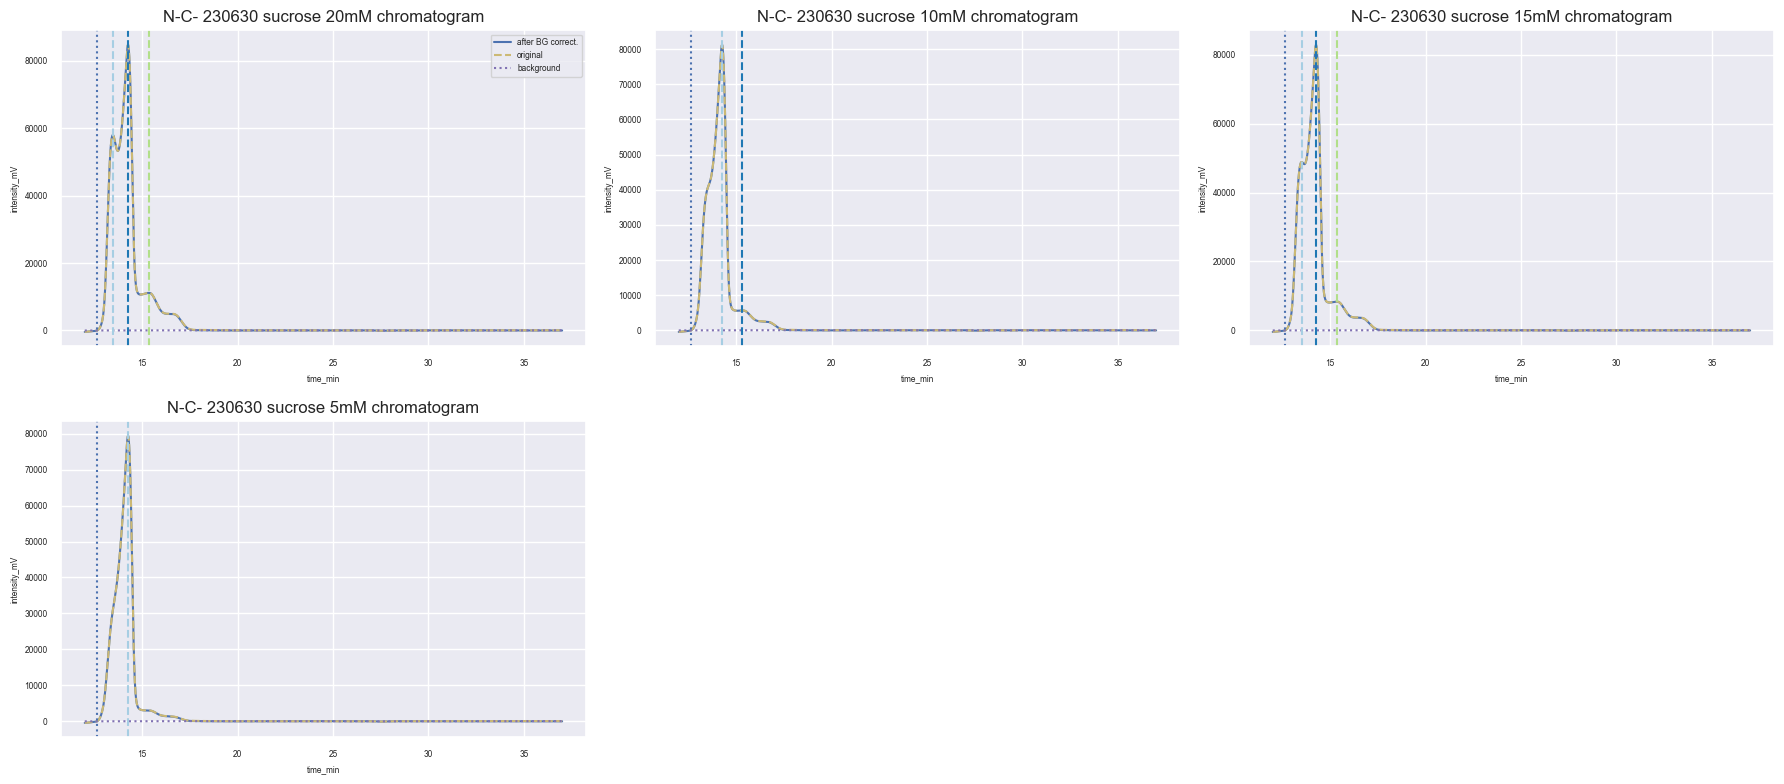

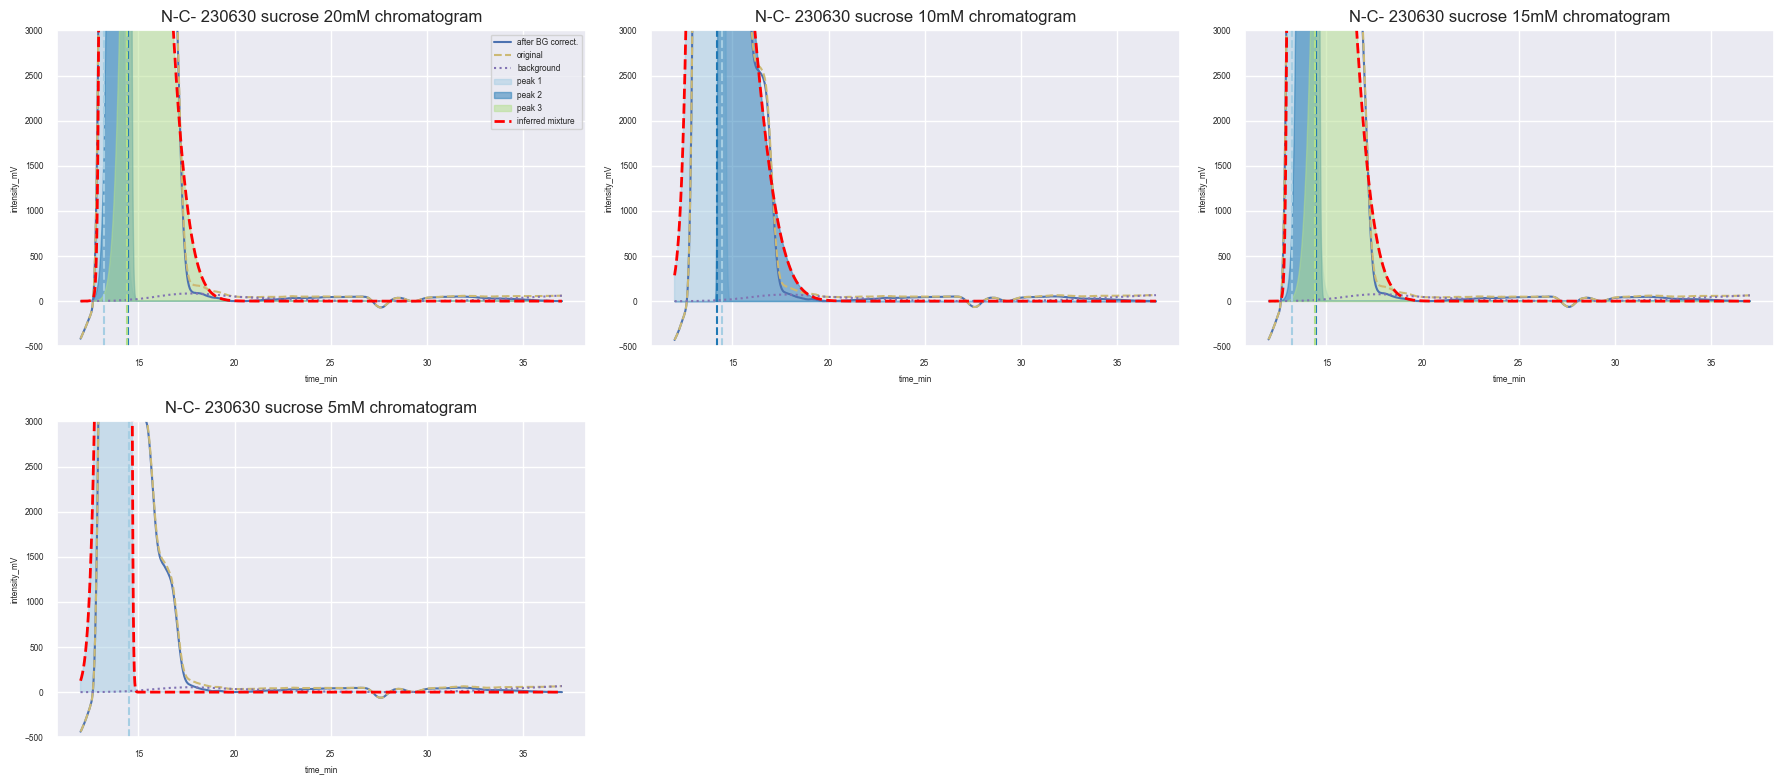

In [26]:
foldername='data_hplcrawdata/Stan_calibration_N-C-_230630_succrose'
substratelist=["succrose"]
timewindows=[[13.3,13.6]]

filename_settings="hplc_settings_calibration.csv"
date="2307"
name_prefix="N-C-"
#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=[13.4,14.5] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=1000,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)


# N-C- for comparison all and non sugars

Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.75it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1137: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  #find minimum
Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:43<00:00, 51.91s/it]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1330: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  colorl

retention_time  retention_time_firstguess     scale      skew  \
0       13.204414                   13.48333  0.660424  4.131697   
1       14.387347                   14.22500  0.239670 -1.570471   
2       15.553544                   15.69167  0.294245  1.081075   
3       16.987027                   16.91667  0.329047 -1.814132   
4       17.253228                   17.33333  0.335917  0.572450   
0       14.486868                   14.26667  0.621761 -6.003596   

      amplitude          area  peak_idx  \
0  44671.639627  73951.132853         1   
1  39138.068569  23512.698085         2   
2  44266.157760  32649.063719         3   
3  16464.308977  13579.742354         4   
4  33979.112074  28611.088650         5   
0  40099.085813  62491.541145         1   

                                              sample  
0  N-C-_230630_glu20_sor15_fru10_suc10_xyl8_mal5_...  
1  N-C-_230630_glu20_sor15_fru10_suc10_xyl8_mal5_...  
2  N-C-_230630_glu20_sor15_fru10_suc10_xyl8_mal5_...  
3  N-C-_230630_glu20_sor15_fru10_suc10_xyl8_mal5_...  
4  N-C-_230630_glu20_sor15_fru10_suc10_xyl8_mal5_...  
0                           N-C-_230630_chromatogram

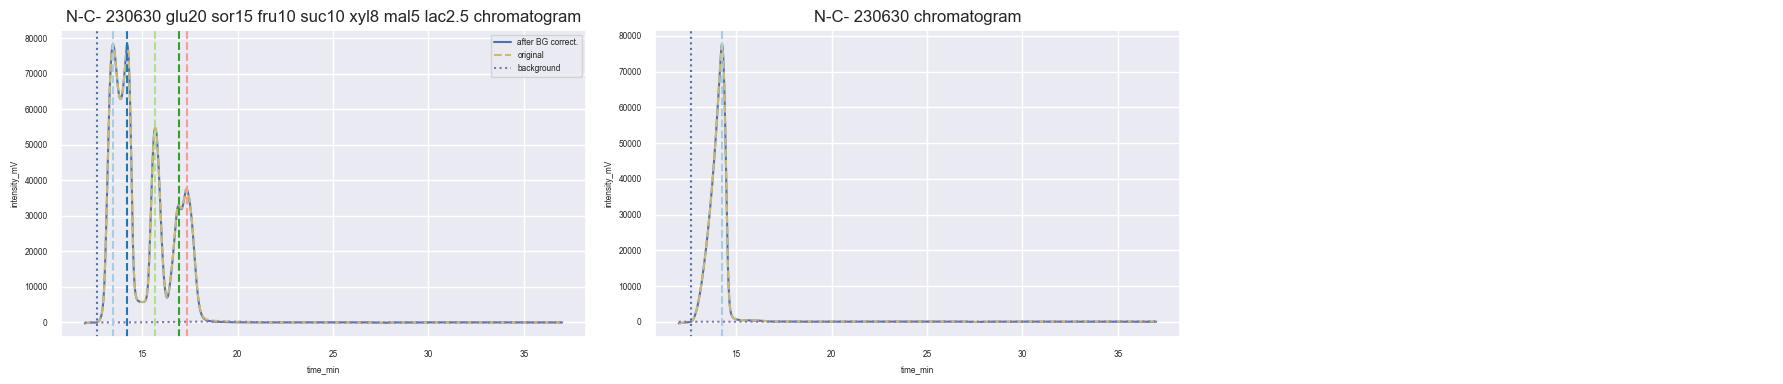

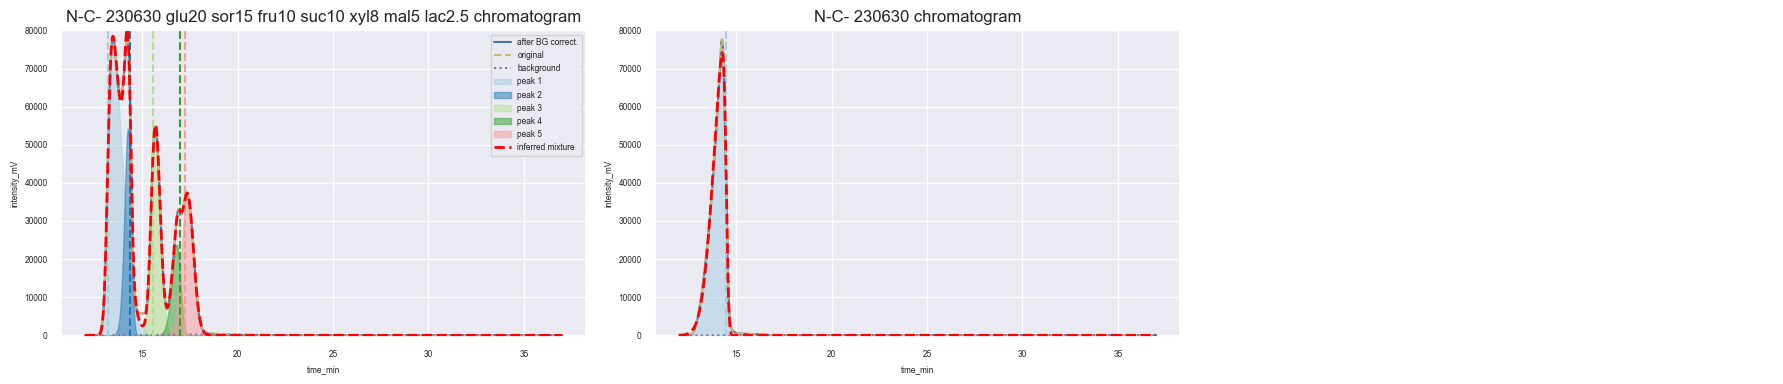

In [30]:
plot_time_window=None
#simply plot all and non sugars
foldername='data_hplcrawdata/Stan_calibration_N-C-_230630_all_and_no_sugars'
substratelist=[]
timewindows=[]
filename_settings="hplc_settings_calibration.csv"
date="220331"
name_prefix="N-C-"
#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=[] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=1000,display_fullpeaklist=True,plot_time_window=plot_time_window, plot_upper_limit=80000,plot_lower_limit=-500,)


Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.58it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1137: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  #find minimum
Processing files...:   0%|                                                                                                      | 0/6 [00:00<?, ?it/s]/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:638: PeakPropertyWarning: some peaks have a prominence of 0
  for j, r2 in enumerate(ranges):
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:638: PeakPropertyWarning: so

Unexpected exception formatting exception. Falling back to standard exception


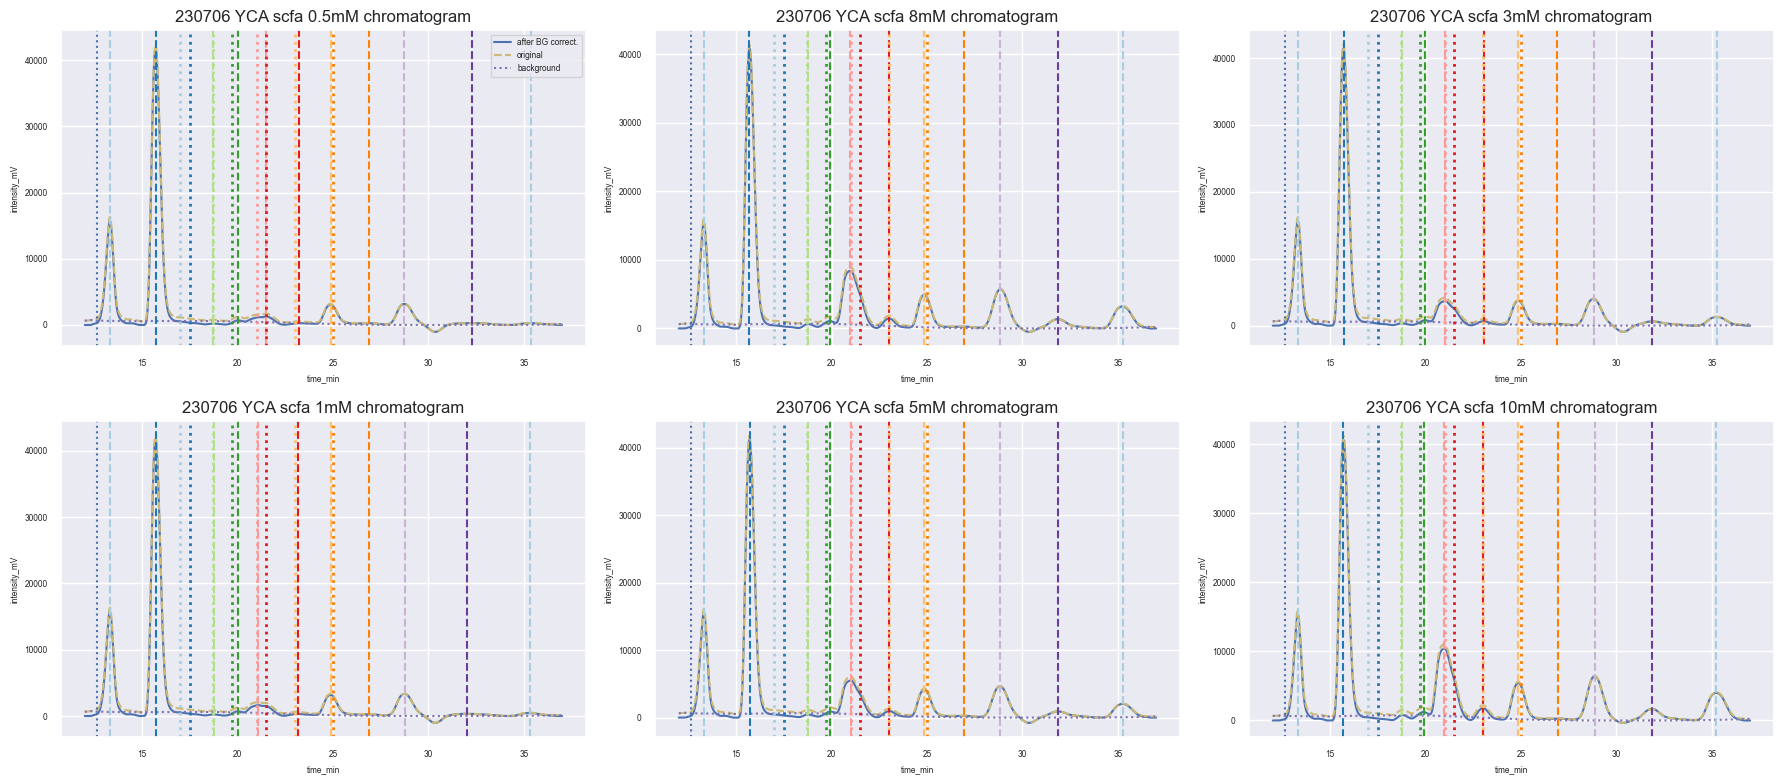

In [19]:
filename_settings="hplc_settings_calibration.csv"
date="230706"
folder="data_hplcrawdata/Stan_YCA_scfa_calibration_230706_2.5mM"
name_prefix="YCA_PaloAlto"

#start with butyrate

substratelist=["butyrate"]
timewindows=[[33.5,35]]

substratelist=["succinte"]
timewindows=[[20.5,20.9]]

#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=None #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(folder,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=1000,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)

#substratelist=["propionate","succinate","lactate","formate","acetate","butyrate","ethanol"]
#timewindows=[[28,29], [20,20.9],[20.9,21.8],[21.8,23.5],[23.7,25],[33.5,35], [30,32]]
#cremerlab.hplc.run_calibration(folder,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json', save_full_calibrationcurve='data_calibration', AUC_treshhold=1000,display_fullpeaklist=True,plot_time_window=None, plot_upper_limit=3000,plot_lower_limit=None,)

read****
hplc_settings_calibration.csv


Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.69it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1116: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.14s/it]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1311: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to 

******Calibration curve*****
Calibration for substrate maltose
[13, 14]
Peaks associated with substrate


retention_time  retention_time_firstguess        scale         skew  \
1       13.195524                   12.25000  1273.445547  1321.722919   
2       13.188431                   13.34167     0.285212     1.709079   
2       13.192089                   13.35000     0.294286     1.876888   
2       13.184921                   13.33333     0.281824     1.653084   
2       13.178279                   13.32500     0.276522     1.554038   
1       13.169735                   13.30833     0.266698     1.264208   

       amplitude          area  peak_idx  \
1     446.777483   1007.669212         2   
2   58165.858415  41577.087812         3   
2  101411.017780  74807.495184         3   
2   47877.192568  33820.629586         3   
2   35173.367676  24377.574824         3   
1   21634.477498  14452.375697         2   

                                  sample  
1  230618_YCA_10mM_Mal_10mM_chromatogram  
2  230618_YCA_10mM_Mal_10mM_chromatogram  
2  230618_YCA_20mM_Mal_20mM_chromatogram  
2    230618_YCA_8mM_Mal_8mM_chromatogram  
2    230618_YCA_5mM_Mal_5mM_chromatogram  
1    230618_YCA_2mM_Mal_2mM_chromatogram

Slope: 0.000297403767025336
Intercept: -2.243953921445275
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1612: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if len(concs)>len(list_samplenames):


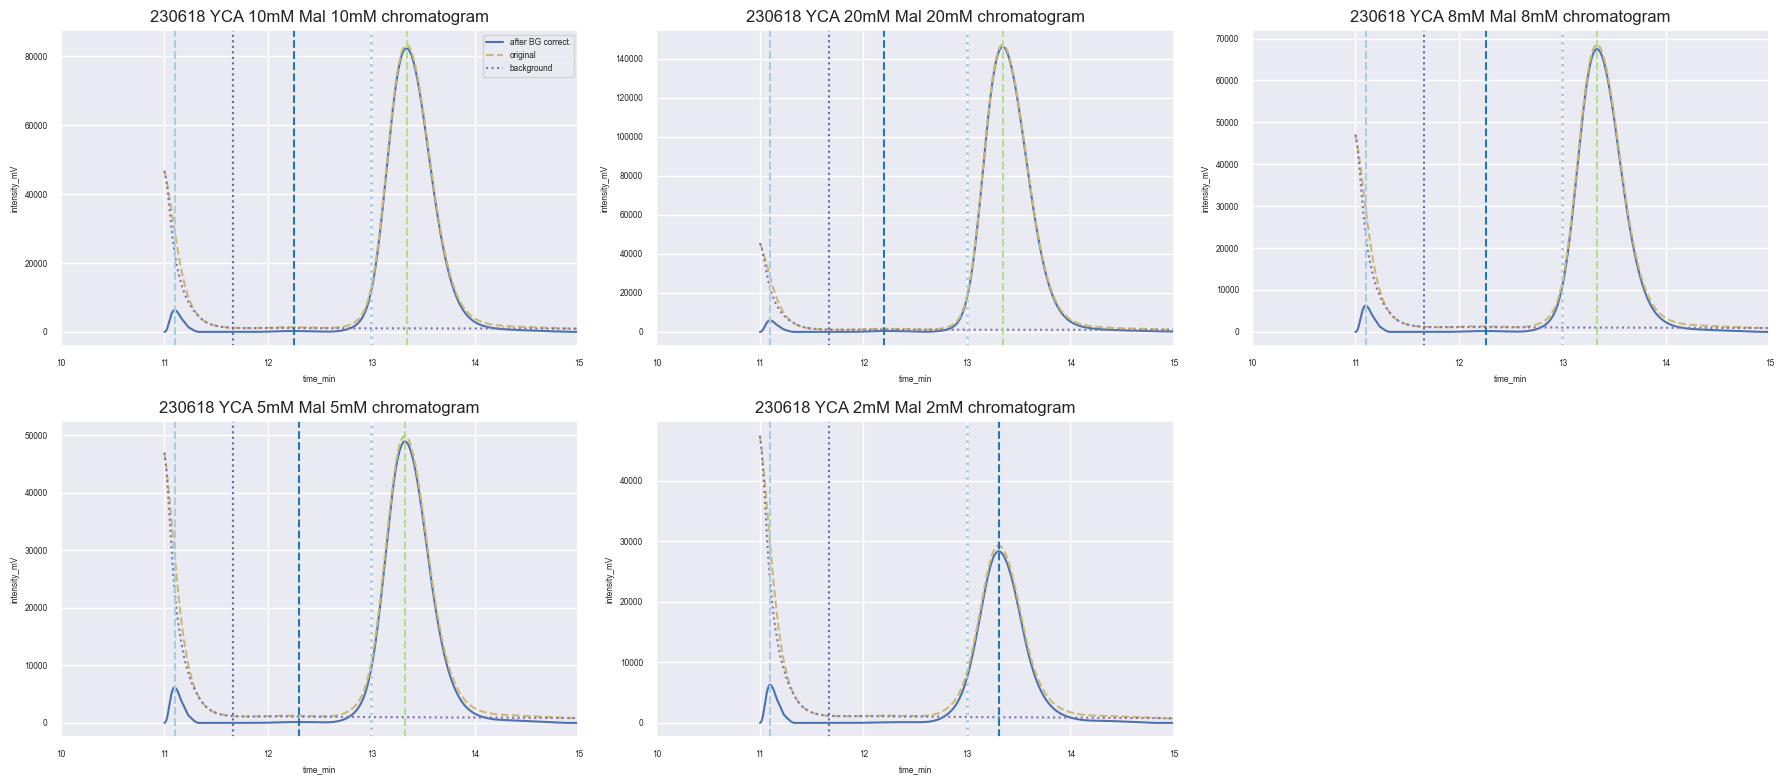

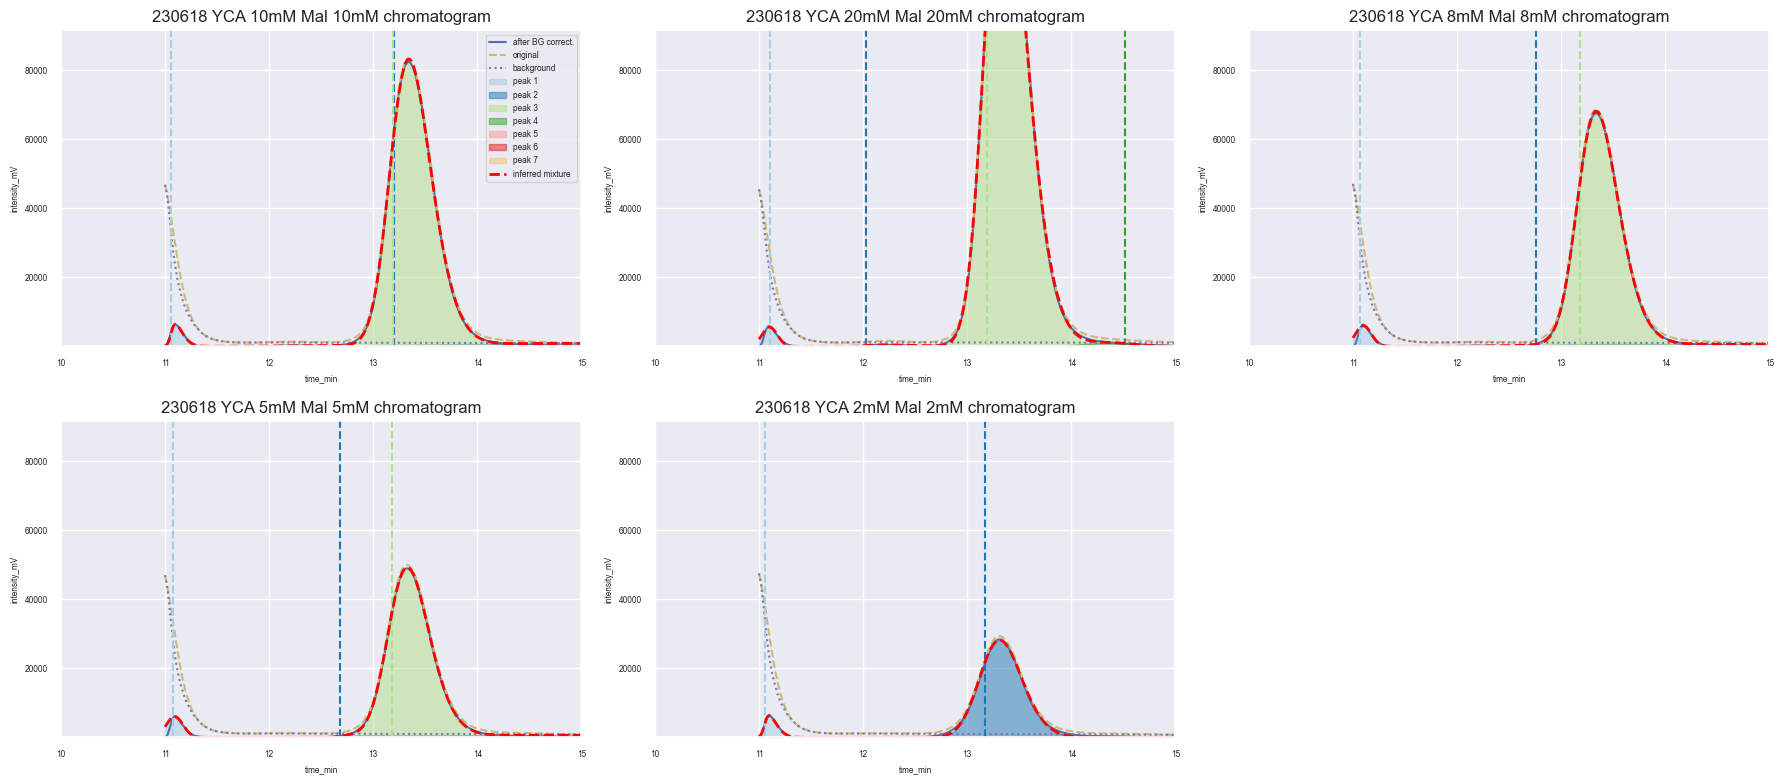

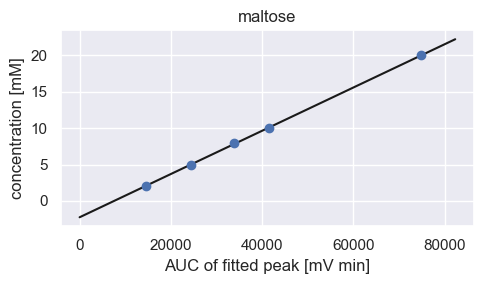

In [8]:
#maltose looks good
filename_settings="hplc_settings_calibration.csv"
date="230706"
folder="data_hplcrawdata/Stan_YCA_calibration_2.5mM_H2SO4_mal"
name_prefix="YCA_PaloAlto"
substratelist=["maltose"]
timewindows=[[13,14]]
cremerlab.hplc.run_calibration(folder,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json', save_full_calibrationcurve='data_calibration', AUC_treshhold=2000,plot_time_window=[10,15], plot_upper_limit=None,plot_lower_limit=None,)

Processing files...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.67it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1137: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...:   0%|                                                                                                      | 0/6 [00:00<?, ?it/s]/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:638: PeakPropertyWarning: some peaks have a prominence of 0
  out = scipy.signal.peak_widths(intensity, peaks,
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/c

******Calibration curve*****
Calibration for substrate glucose
[15, 16.3]
Peaks associated with substrate


retention_time  retention_time_firstguess     scale      skew  \
1       15.501155                   15.67500  0.322338  1.911497   
1       15.495998                   15.67500  0.326127  1.947018   
1       15.505246                   15.67500  0.321068  1.890708   
1       15.503112                   15.67500  0.322011  1.897534   
1       15.508107                   15.67500  0.322065  1.910258   
1       15.510271                   15.68333  0.321803  1.910479   

      amplitude          area  peak_idx  \
1  17985.594976  14532.016954         2   
1   9091.900542   7432.438930         2   
1  37266.982511  29992.412334         2   
1  27101.104770  21874.991802         2   
1  46098.786299  37215.464129         2   
1  54688.813148  44114.221849         2   

                                            sample  
1   230618_YCA_3mM_scfa_10mM_glu_10mM_chromatogram  
1   230618_YCA_0.5mM_scfa_5mM_glu_5mM_chromatogram  
1   230618_YCA_5mM_scfa_20mM_glu_20mM_chromatogram  
1   230618_YCA_1mM_scfa_15mM_glu_15mM_chromatogram  
1   230618_YCA_8mM_scfa_25mM_glu_25mM_chromatogram  
1  230618_YCA_10mM_scfa_30mM_glu_30mM_chromatogram

Slope: 0.0006738621171678894
Intercept: 0.07375201863073144
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis/cremerlab/hplc.py:1641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


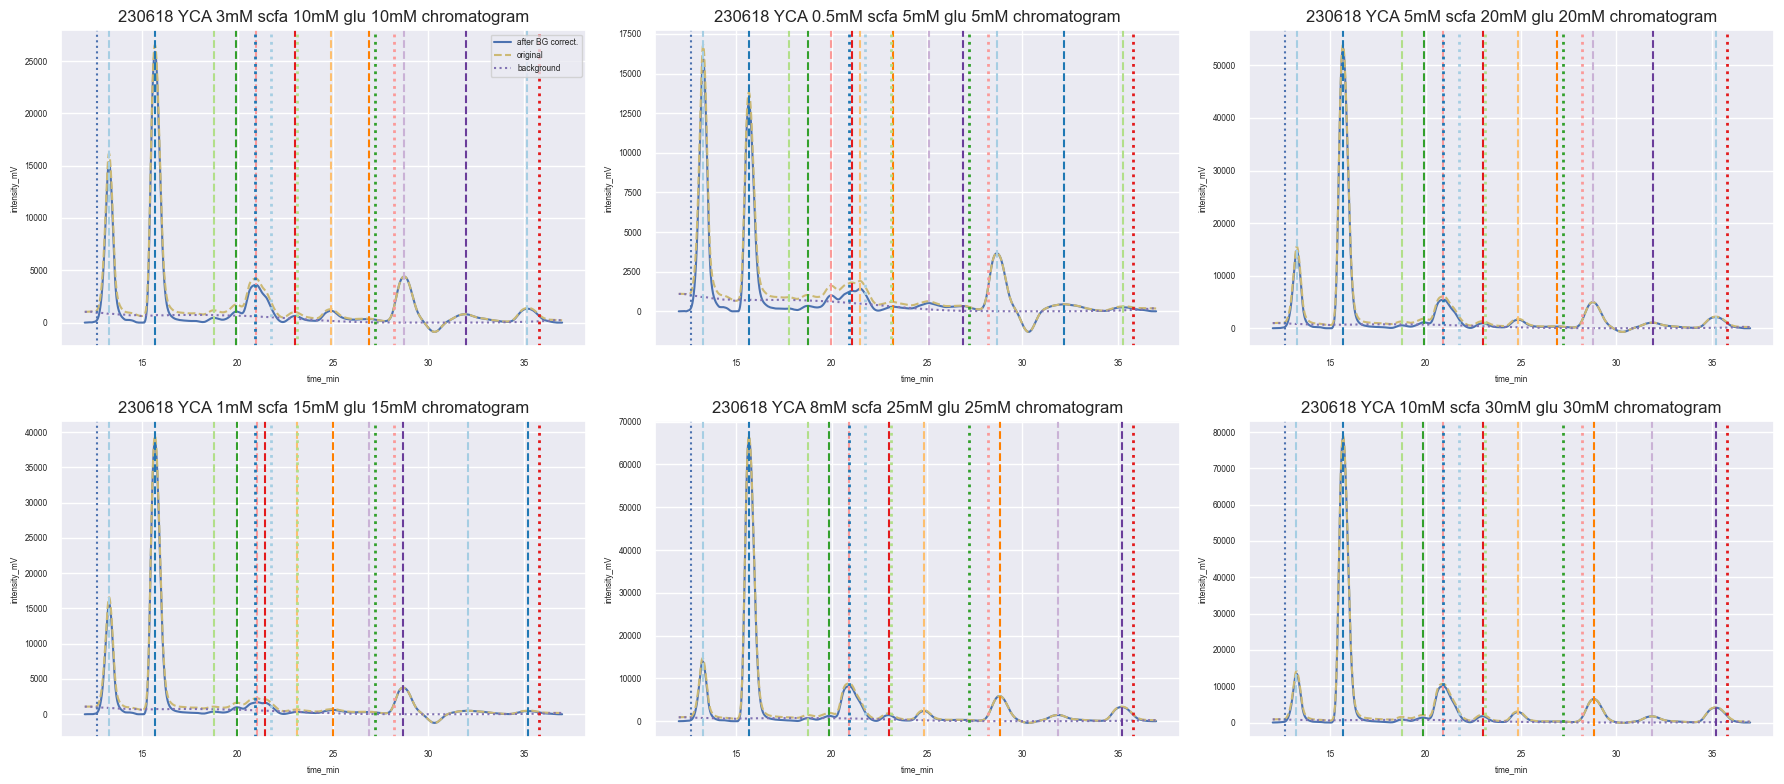

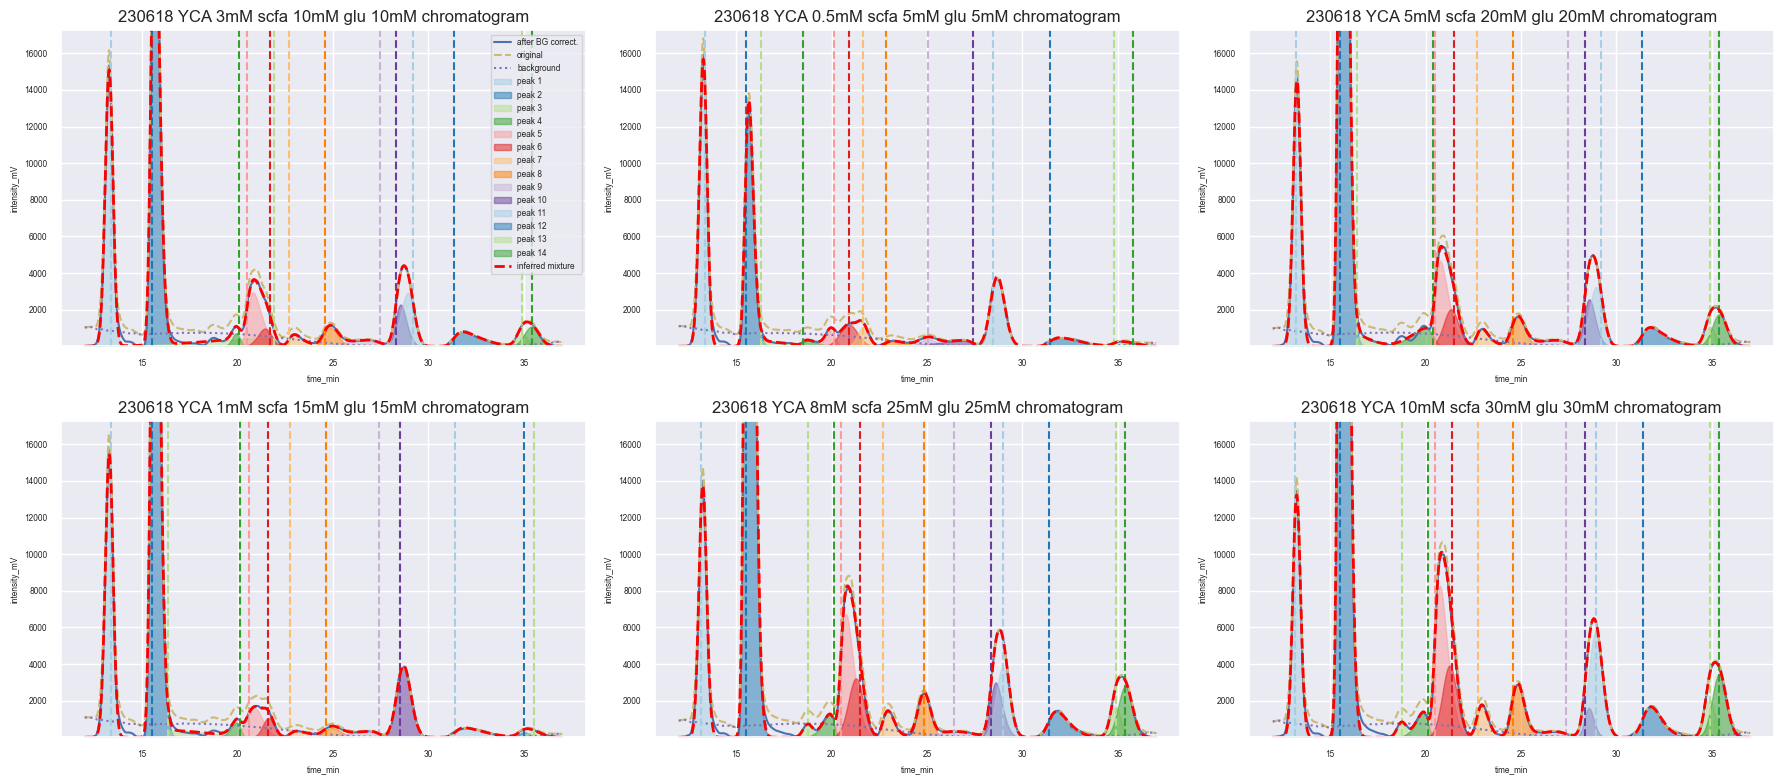

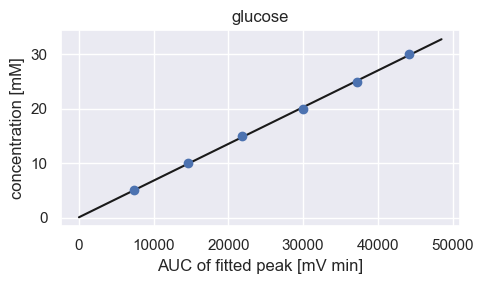

In [3]:
#glucose looks good
filename_settings="hplc_settings_calibration.csv"
date="230706"
folder="data_hplcrawdata/Stan_YCA_calibration_2.5mM_H2SO4"
name_prefix="YCA_PaloAlto"
substratelist=["glucose"] #"propionate","succinate","lactate","formate","acetate","butyrate","ethanol"
timewindows=[[15,16.3]]
cremerlab.hplc.run_calibration(folder,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json', save_full_calibrationcurve='data_calibration', AUC_treshhold=2000,plot_time_window=None, plot_upper_limit=None,plot_lower_limit=None,)

In [ ]:
#N-C- calibration (different sugars)
filename_settings="hplc_settings_calibration.csv"
date="230706"
folder="data_hplcrawdata/Stan_calibration_N-C-_230630_frulac"
name_prefix="N-C-"
substratelist=["fructose","lactose"]
timewindows=[[15,16],[27,29],[20.6,21.2], [20,20.9]]

lll

folder="data_hplcrawdata/Stan_calibration_N-C-_230630_succrose"
name_prefix="N-C-"
substratelist=["succrose"]
timewindows=[[15,16],[27,29],[20.6,21.2], [20,20.9]]

folder="data_hplcrawdata/Stan_calibration_N-C-_230630_diffsugars"
name_prefix="N-C-"
substratelist=["xylose","sorbitol","glucose","maltose"]
timewindows=[[15,16],[27,29],[20.6,21.2], [20,20.9]]

#acetate N-C- where


In [ ]:
# old




lll
#start with butyrate

substratelist=["butyrate"]
timewindows=[[33.5,35]]

substratelist=["succinte"]
timewindows=[[20.5,20.9]]

#name='epsilon_formate'
#date='220331'
#peak_retentiontime=[23.1,23.6]



foldername="data_hplcrawdata/Stan_N-C-_ethanol_propionate_calibration"
cremerlab.hplc.generate_setting_template(foldername,output="hplc_settings_template2.csv",hplc_machine="Shimadzu_ProminenceLC2030C") 

#foldername='N-C-_ethanol_propionate_calibration'
#name='N-C-_propionate' #name of calbiration
#date='220610'
#peak_retentiontime=[29., 30.]

#set variables
#name='N-C-_ethanol' #name of calbiration
#date='220610'
#peak_retentiontime=[32,33]


foldername="data_hplcrawdata/Stan_epsilon_glucose_butyrate_cal"
cremerlab.hplc.generate_setting_template(foldername,output="hplc_settings_template3.csv",hplc_machine="Shimadzu_ProminenceLC2030C") 

#butyrate and acetate
#name='epsilon_glucose'

#date='220331'
#peak_retentiontime=[15., 16.]

#name='epsilon_butyrate'
peak_retentiontime=[35., 37.]

#lactate
foldername='data_hplcrawdata/Stan_lactate_calibration_epsilon'
cremerlab.hplc.generate_setting_template(foldername,output="hplc_settings_template4.csv",hplc_machine="Shimadzu_ProminenceLC2030C") 

#name='epsilon_succinate' #name of calbiration
#peak_retentiontime=[20.6,21.2]
#date='220321'

#formate
foldername='data_hplcrawdata/Stan_Formate_calibration'
cremerlab.hplc.generate_setting_template(foldername,output="hplc_settings_template5.csv",hplc_machine="Shimadzu_ProminenceLC2030C") 

#name='epsilon_formate'
#date='220331'
#peak_retentiontime=[23.1,23.6]